## Chap 1  Exploring market risk-factors

course is based on extracts from

book:  **Quantitative Risk Management Concepts, Techniques and Tools**

by: Alexander McNeil, Rudiger Frey, Paul Ebrechts

**Managing Riks:**
* Selling assets, diversifying portfolios, heding
* Maintaining sufficient capital to withstand losses

**Value-at-risk (VaR) is a well-known measure of risk**

#### Risk Factors
* value of portfolio depends on many risk factors
* e.g.  equity indexes/prices, fx rates, interest ratse

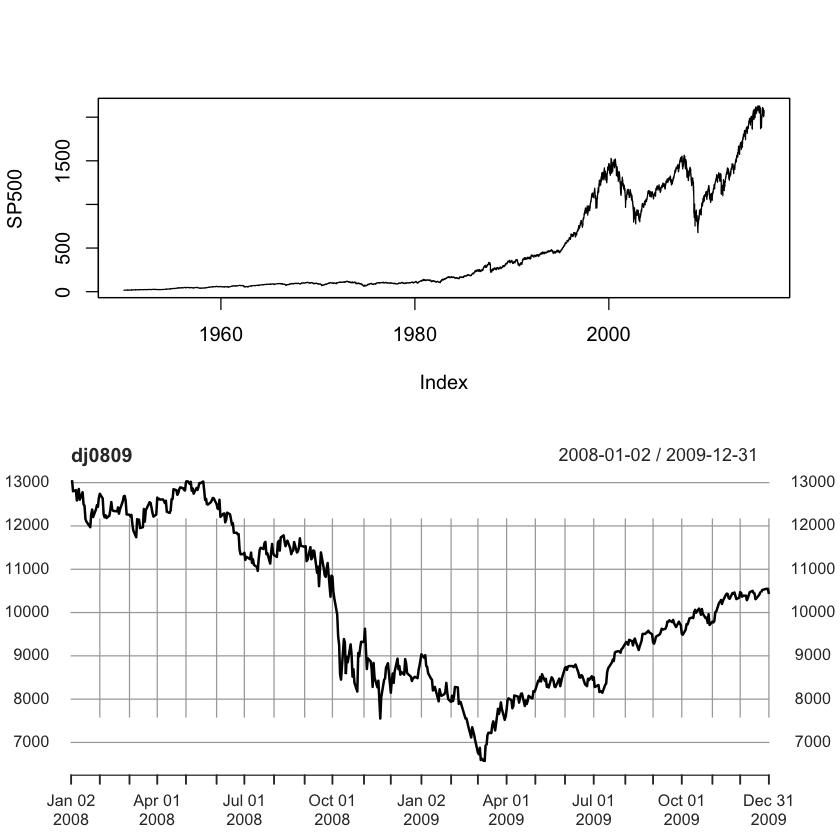

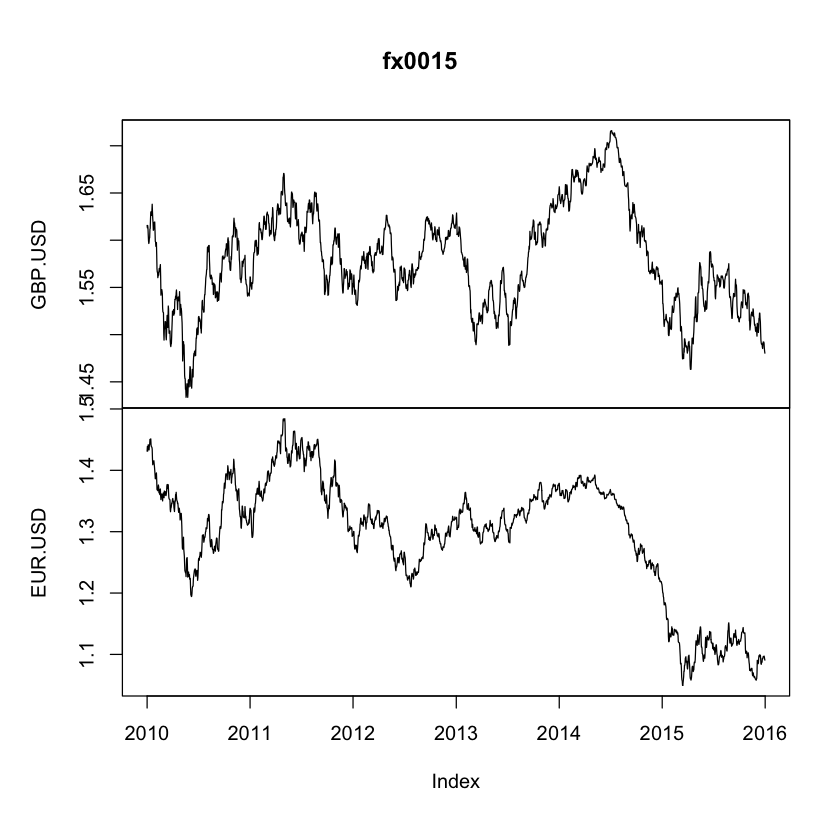

In [41]:
## load sp500 and dj  show plots of all history of sp500 and crisis 2008 in dj
require(qrmdata)
require(zoo)
data(SP500)
data(DJ)
dj0809 <- DJ["2008-01-01::2009-12-31"]
par(mfrow=c(2,1))
plot.zoo(SP500)
plot(dj0809)

## fx data
data("GBP_USD")
data("EUR_USD")
fx <- merge(GBP_USD, EUR_USD, all=TRUE)
fx0015 <- fx["2010/2015",]
plot.zoo(fx0015)

### Risk factor returns

Let ($Z_t$) denote a time series of risk factor values
Returns can be defined
* simple returns $X_t = Z_t - Z_{t-1}$

* relative returns $X_t = \frac{Z_t - Z_{t-1}}{Z_{t-1}}$

* **log returns** $X_t = ln(Z_t) - ln(Z_{t-1})$

**properties of log returns**

* $ln(Z_t) - ln(Z_{t-1}) \approx \frac{Z_t - Z_{t-1}}{Z_{t-1}}$

* easy to aggregate to obtain longer interval log-returns

* independent normal if risk factors follow geometric Brownian motion (GBM)


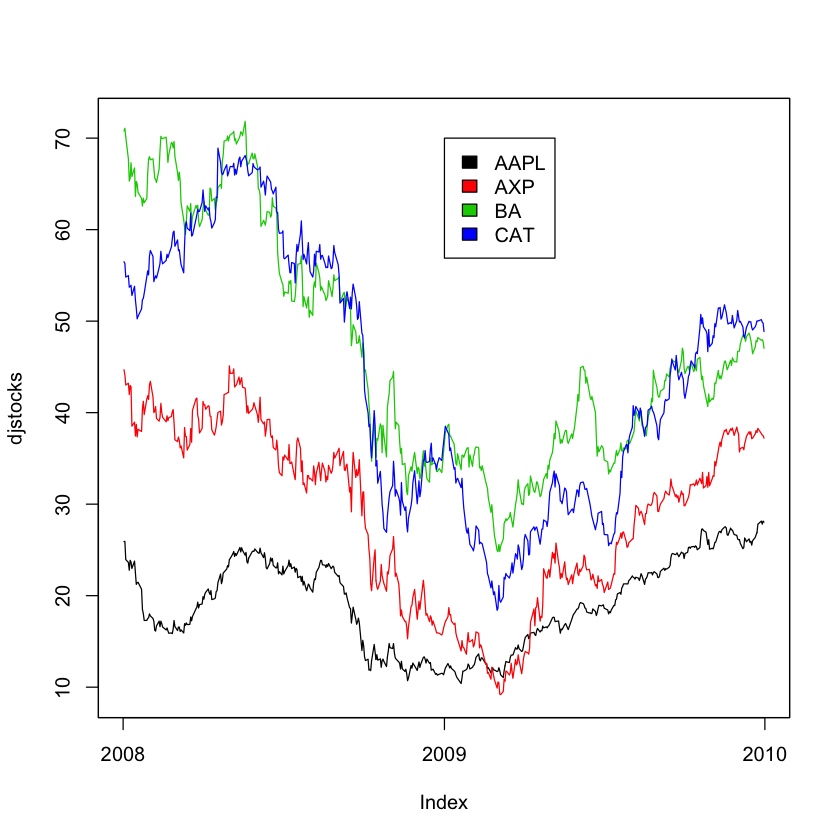

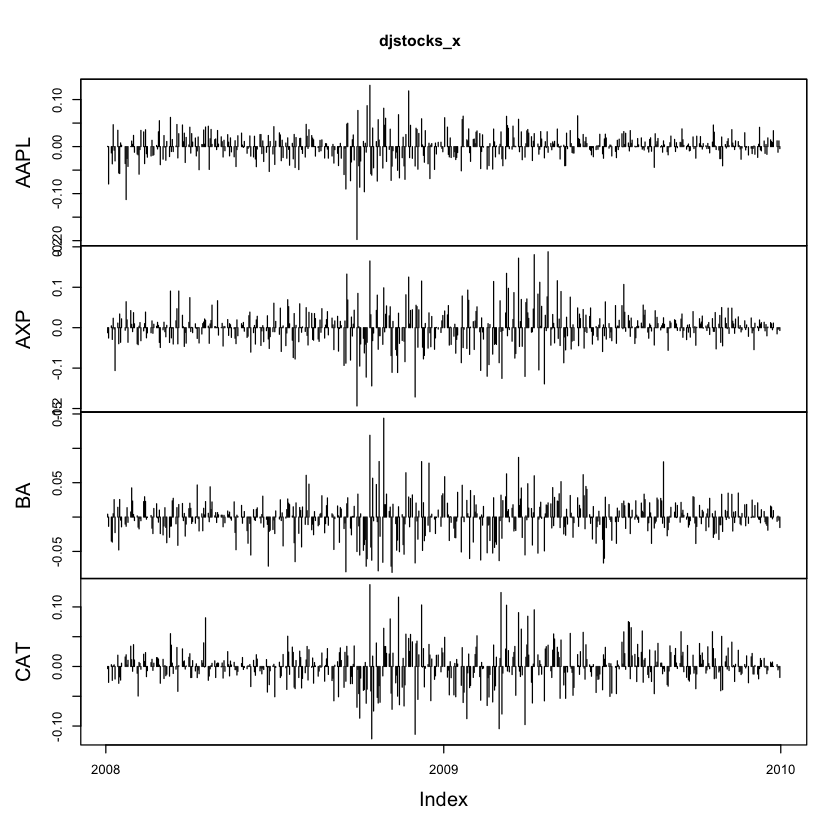

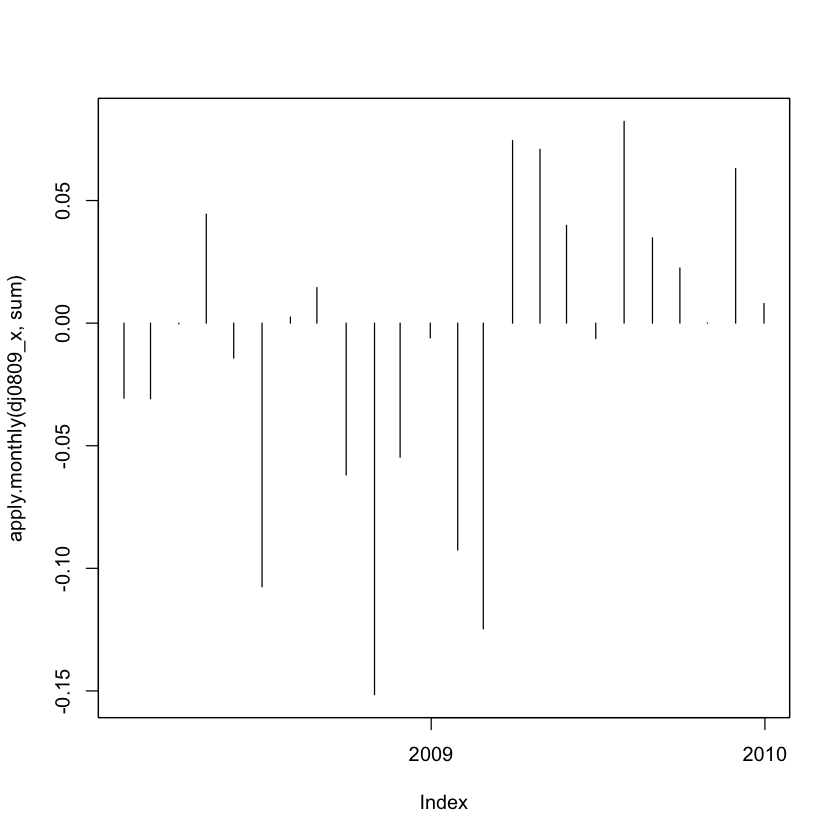

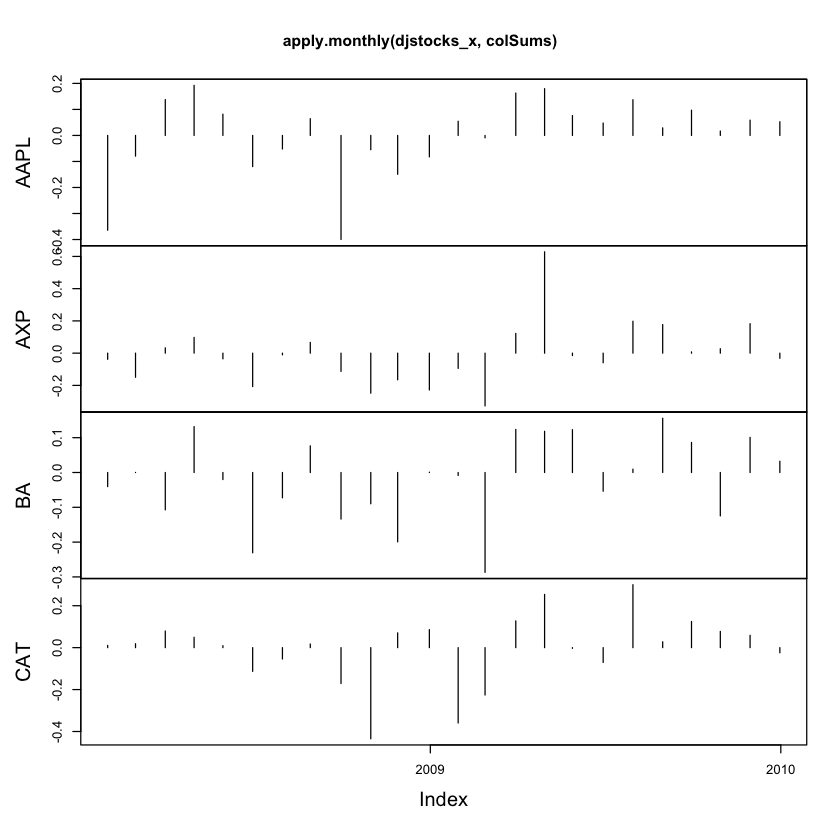

In [42]:
##plotting log returns
require(xts)

data(DJ_const)
djstocks <- DJ_const["2008/2009",c("AAPL", "AXP", "BA", "CAT")]

plot.zoo(djstocks, plot.type="single", col=c(1,2,3,4))
legend(julian(x = as.Date("2009-01-01")), y = 70, legend = names(DJ_const)[1:4], fill = 1:4)

djstocks_x <- diff(log(djstocks))[-1] #strip off 1st NA value
plot.zoo(djstocks_x, type="h")

dj0809_x <- diff(log(dj0809))[-1]

##use apply to aggregate log returns to longer periods
plot.zoo(apply.monthly(dj0809_x,sum),type="h")

#same aggregartion of log returns with multi-column xts object
plot.zoo(apply.monthly(djstocks_x,colSums), type="h")

### Yields as risk factors
** yield ** $y(t,T)$ at time t of maturity T
$$y(t,T) = \frac{-ln\,p(t,T)}{T-t}$$
where $p(t,T)$ is the price of maturity T at time t

y(t,10) : yield for a 10-year bond acquired at time 5

* the mapping T to y(t,T) is called a yield curve at time t

In low (negative) interest rate environments there are arguments to use simple returns of yields  over log-returns

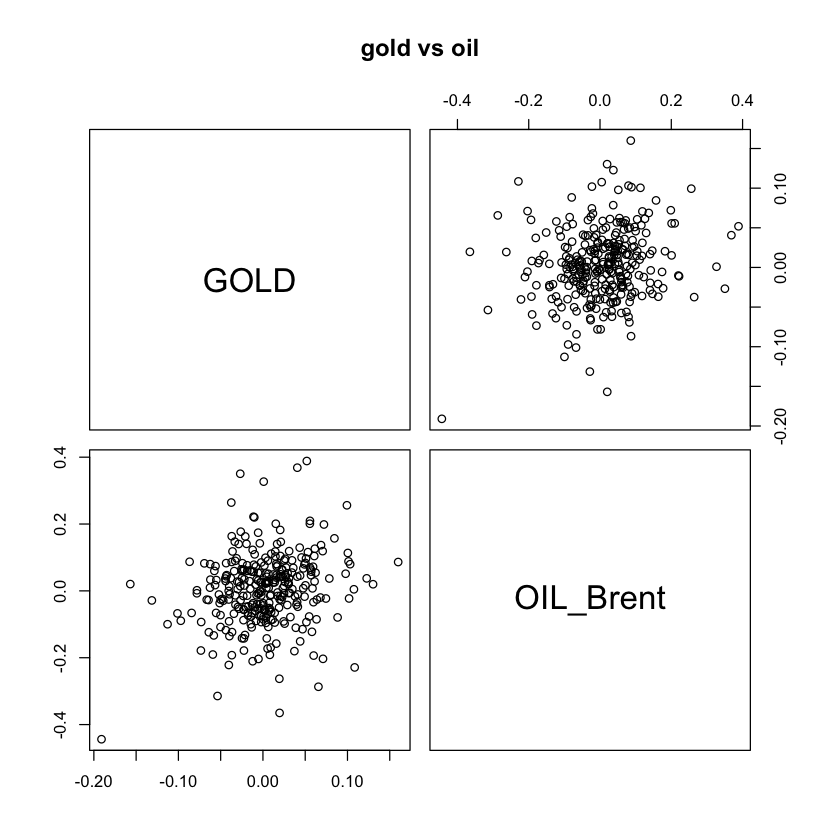

In [43]:
### commo data

data("GOLD")
data("OIL_Brent")

gold<-GOLD["1990::",]
oil <- OIL_Brent["1990::",]

##daily log returns
goldx <-diff(log(gold))[-1]
oilx <- diff(log(oil))[-1]

##monthly 
goldx_m <- apply.monthly(goldx, sum)
oilx_m <- apply.monthly(oilx, sum)

coms <- merge(goldx_m, oilx_m)
## see correlation between gold and oil
pairs(as.zoo(coms),main="gold vs oil")


[1] "0.25y"  "0.50y"  "0.75y"  "1.00y"  "1.25y"  "1.50y"  "1.75y"  "2.00y" 
  [9] "2.25y"  "2.50y"  "2.75y"  "3.00y"  "3.25y"  "3.50y"  "3.75y"  "4.00y" 
 [17] "4.25y"  "4.50y"  "4.75y"  "5.00y"  "5.25y"  "5.50y"  "5.75y"  "6.00y" 
 [25] "6.25y"  "6.50y"  "6.75y"  "7.00y"  "7.25y"  "7.50y"  "7.75y"  "8.00y" 
 [33] "8.25y"  "8.50y"  "8.75y"  "9.00y"  "9.25y"  "9.50y"  "9.75y"  "10.00y"
 [41] "10.25y" "10.50y" "10.75y" "11.00y" "11.25y" "11.50y" "11.75y" "12.00y"
 [49] "12.25y" "12.50y" "12.75y" "13.00y" "13.25y" "13.50y" "13.75y" "14.00y"
 [57] "14.25y" "14.50y" "14.75y" "15.00y" "15.25y" "15.50y" "15.75y" "16.00y"
 [65] "16.25y" "16.50y" "16.75y" "17.00y" "17.25y" "17.50y" "17.75y" "18.00y"
 [73] "18.25y" "18.50y" "18.75y" "19.00y" "19.25y" "19.50y" "19.75y" "20.00y"
 [81] "20.25y" "20.50y" "20.75y" "21.00y" "21.25y" "21.50y" "21.75y" "22.00y"
 [89] "22.25y" "22.50y" "22.75y" "23.00y" "23.25y" "23.50y" "23.75y" "24.00y"
 [97] "24.25y" "24.50y" "24.75y" "25.00y" "25.25y" "25.50y" "25.75y" "26.00y"
[105] "26.25y" "26.50y" "26.75y" "27.00y" "27.25y" "27.50y" "27.75y" "28.00y"
[113] "28.25y" "28.50y" "28.75y" "29.00y" "29.25y" "29.50y" "29.75y" "30.00y"

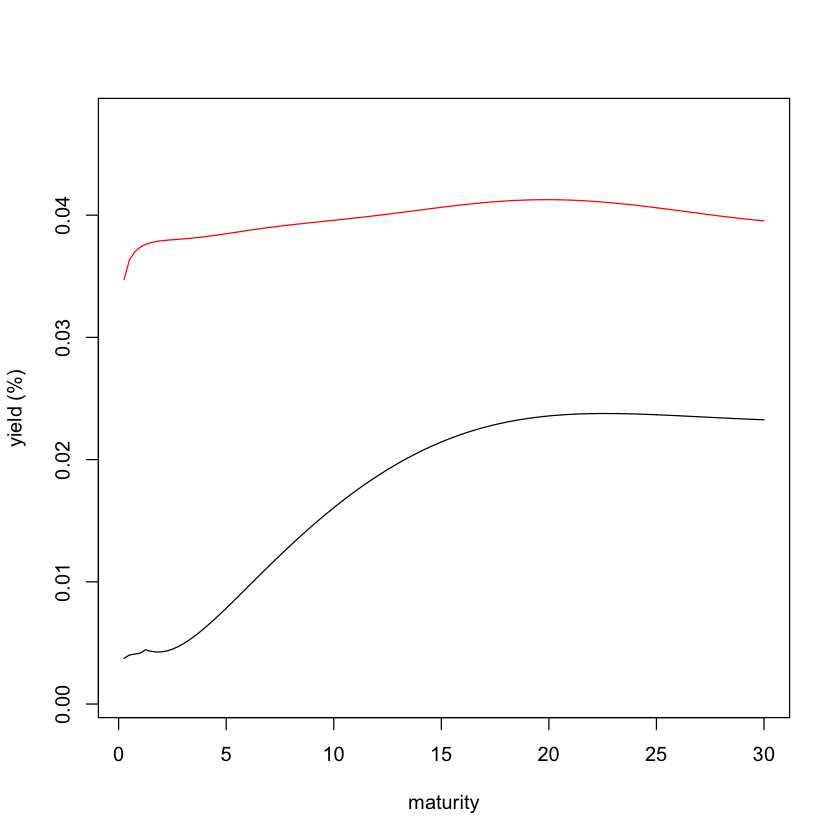

In [44]:
## plot term structure

##interest data
data("ZCB_CA")
zcb <- ZCB_CA["2006::",]
names(zcb)

#log returns
zcb_x <- diff(log(zcb))[-1]

maturity <- (1:120)/4
# Plot the yield curve for the first day of zcb
plot(maturity, zcb[1,], ylim = range(zcb), type = "l",
     ylab = "yield (%)", col = "red")
## add the yeild curve from the last day of zcb
lines(maturity, zcb[nrow(zcb),])



## Chapter 2  Real World returns are riskier than normal

#### in GBM  (geometric brownian motion) model  log returns are normally distributed

Normal distribution (pdf):

$$f_X(x)= \frac{1}{\sigma\sqrt{2\pi}}exp\left(\frac{(x-\mu)^2}{\sigma^2}\right)$$

is characterized only by $\mu$ and $\sigma$   

* Usual notation $ X = N(\mu,\sigma)$
* Parameters easily estimated from data
* Sum of 2+ independent normal variables is also normal

### Central limit theoreme (CLT)

Sum of normal distributions is also normal

#### How to estimate a normal distribution
Answer: sample mean, sample variance

Data: $X_1,...,X_n$

$$\hat{\mu}=\frac{1}{n}\sum_{t=1}^nX_t$$
$$ \sigma^2_u = \hat{Var(X)_u}=\frac{1}{n-1}\sum_{t=1}^n (\mu - X_t)^2$$

u for unbiased estimator


example in R:

`# let ftse be ftse log returns serie
mu <- mean(ftse
sigma <- sd(ftse)
c(mu, sigma) #this comletely defines the normal distribution of log returns of ftse`

![title](img/ftse_hist.png)


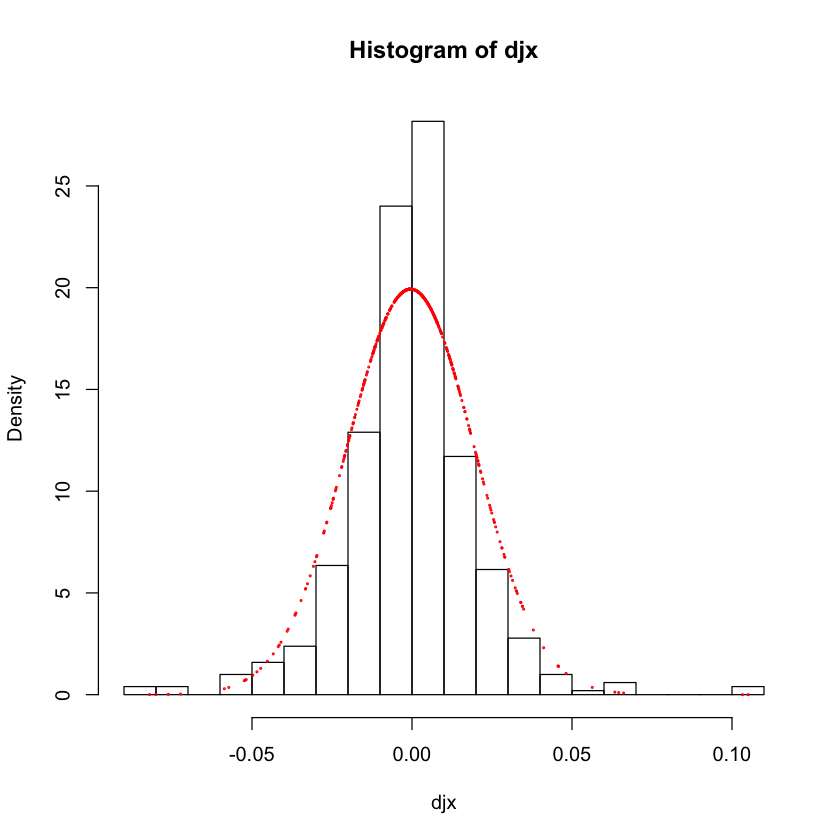

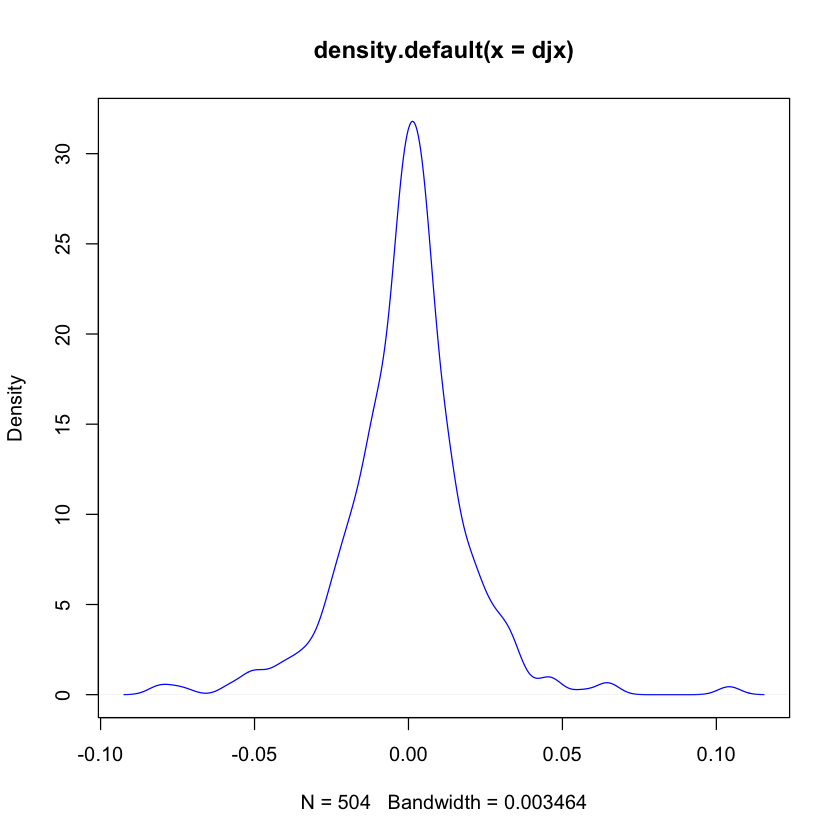

In [45]:
## Graph methods to assess normality

djx <- as.numeric(dj0809_x)
mu <- mean(djx)
sigma <- sd(djx)
hist(djx, nclass=20, probability = TRUE)
points(djx, dnorm(djx,mean=mu,sd=sigma), col = "red", cex=0.2)
plot(density(djx), col="blue", cex=0.2)

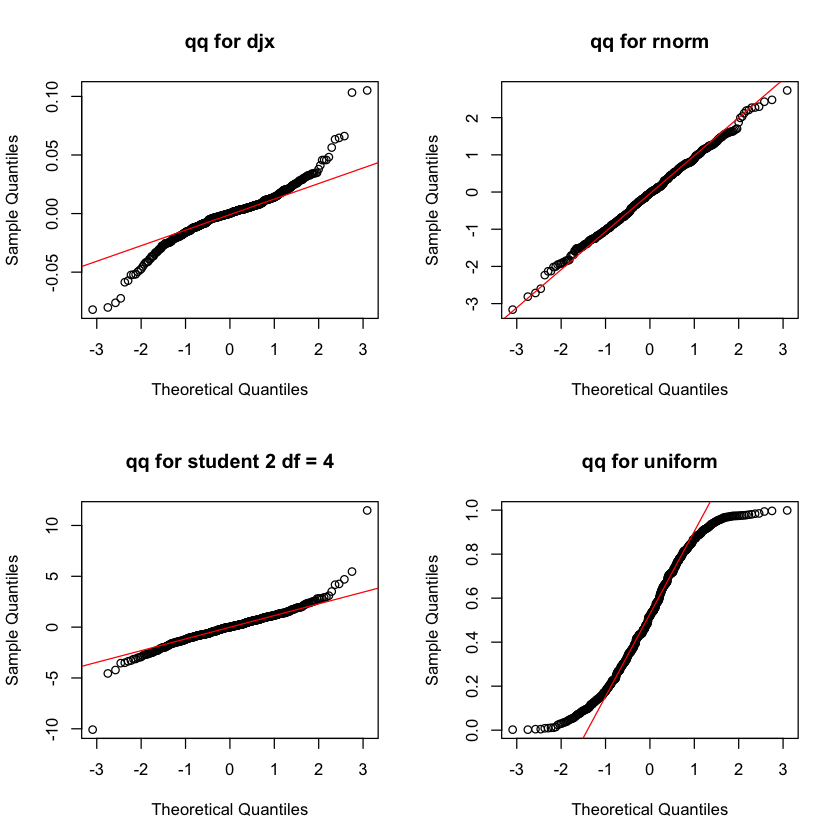

In [46]:
## check for normality of down jones long returns, 
# compare them to normal , student, uniform distributions

n<-length(djx)
x1 <- rnorm(n)
x2 <- rt(n, df = 4)
x3 <- runif(n)

par(mfrow=c(2,2))
qqnorm(djx, main="qq for djx")
qqline(djx, col=2)

qqnorm(x1, main="qq for rnorm")
qqline(x1, col="red")

qqnorm(x2, main="qq for student 2 df = 4")
qqline(x2, col="red")

qqnorm(x3, main="qq for uniform")
qqline(x3, col="red")






![title](img/skew.png)

`
library(moments)
skewness(log_returns) # 0 for symmetric
kurtosis(log_returns  # 3 for normal, bigger = fatter tails
`

**Jarque-Bera test**

Compares skewnes s and kurtosis of data with theoretical
normal values (0 and 3)

$$ T = \frac{1}{6}\left(b^2 + \frac{1}{4}(k-3)^2\right) $$

where b is skewness, k is kurtosis

`jarque.test(rnorm(1000)`  

gives the value below 1. 

`jarque.test(ftse)`

gives the value 428  much higher than 1

### Longer-interval and overlapping returns  

* daily returns are usually very non-normal
* CLT suggests longer interval returns may be less non-normal
* longer interval returns has less data, so statistics are weaker

[1] "dimentsions of djreturns:"


[1] 1008   30

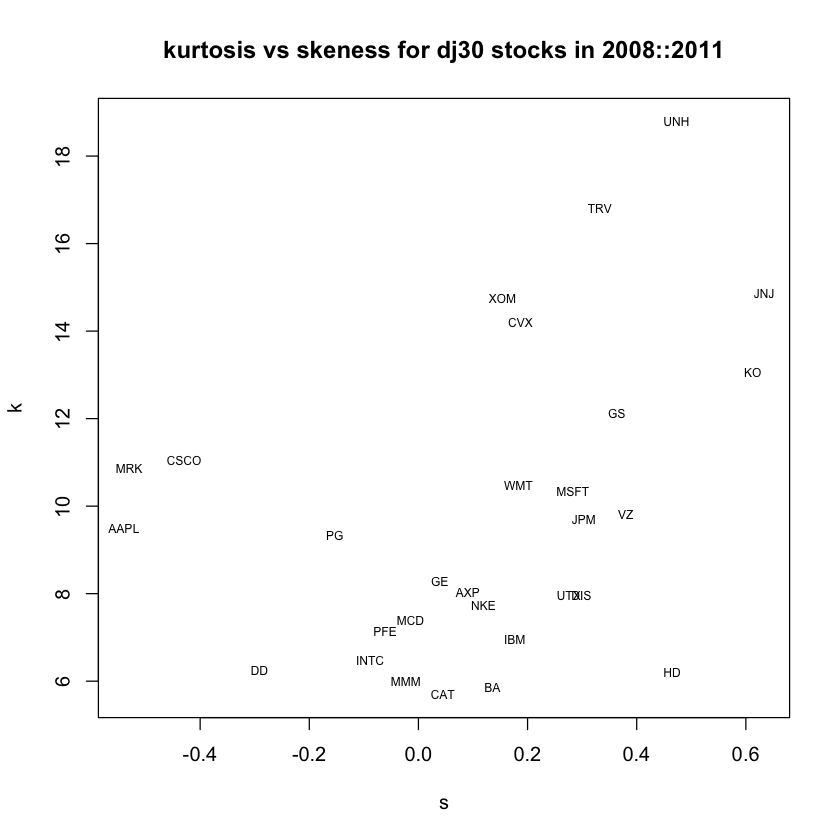

In [47]:
## checks skewness and returns in constituest of DJI
require(moments)

djreturns <- diff(log(DJ_const["2008::2011",]))[-1]  #30 stocks for 4 years daily log-returns

print('dimentsions of djreturns:')
dim(djreturns)

s <- apply(djreturns, FUN=skewness, MARGIN=2)
k <- apply(djreturns, FUN=kurtosis, MARGIN=2)

plot(s,k,type="n",
         main="kurtosis vs skeness for dj30 stocks in 2008::2011")
text(s, k, names(s), cex = 0.6)

## jarque-bera on all stocks

all_jart <- apply(djreturns, FUN=jarque.test, MARGIN=2)

#all_jart



In [48]:
## jarque test on daily, weekly monthly data

tickers29 <- c("AAPL","AXP","BA","CAT","CSCO","CVX","DD","DIS","GE","GS","HD","IBM","INTC","JNJ","JPM","KO","MCD","MMM","MRK","MSFT","NKE","PFE","PG","TRV","UNH","UTX","VZ","WMT","XOM")
djx_d <-  diff(log(DJ_const["1999-12-31::",tickers29]))[-1] # get daiy log returns

djx_w <- apply.weekly(djx_d, colSums) 
djx_m <- apply.monthly(djx_d, colSums) 

jd <- apply(djx_d, MARGIN=2, function(v){jarque.test(v)$statistic})
jw <- apply(djx_w, MARGIN=2, function(v){jarque.test(v)$statistic})
jm <- apply(djx_m, MARGIN=2, function(v){jarque.test(v)$statistic})

## we see a tendency on lower period that returns become less non-normal
jd
print('weekly')
jw
print('monthly')
jm



AAPL         AXP          BA         CAT        CSCO         CVX 
2035051.842   14398.038    5503.820    3285.799   11276.437   20562.255 
         DD         DIS          GE          GS          HD         IBM 
   4914.360   13668.861   11731.660   23124.652   79956.990   10080.078 
       INTC         JNJ         JPM          KO         MCD         MMM 
  12323.748   41799.007   27011.833   12063.579    6734.338    4386.859 
        MRK        MSFT         NKE         PFE          PG         TRV 
 136653.172   14921.904   24537.847    4449.813 2002047.348   41402.807 
        UNH         UTX          VZ         WMT         XOM 
  62355.484  113295.947    7266.788    5928.948   17923.495

[1] "weekly"


AAPL         AXP          BA         CAT        CSCO         CVX 
 22920.8263   1736.2927   2139.2250    157.7663    519.6823   3757.0285 
         DD         DIS          GE          GS          HD         IBM 
   204.5180   1117.6465   1775.8066   2910.9674   2016.3251    525.6788 
       INTC         JNJ         JPM          KO         MCD         MMM 
   716.5738   2583.4128   5015.2246   2437.3245    198.4247    515.4539 
        MRK        MSFT         NKE         PFE          PG         TRV 
  1292.7683    491.3637   2634.9086    825.4174 179443.8832    980.3985 
        UNH         UTX          VZ         WMT         XOM 
  5243.6185  24773.2464    525.3932    501.0347    771.8484

[1] "monthly"


AAPL         AXP          BA         CAT        CSCO         CVX 
 904.304103 1384.521338  130.959464   83.922752   74.215899    3.339204 
         DD         DIS          GE          GS          HD         IBM 
  10.367670   47.486798   56.231178    6.665703    7.072234   82.779216 
       INTC         JNJ         JPM          KO         MCD         MMM 
 246.857916   33.013528   26.994156   28.150429  119.810108    4.380925 
        MRK        MSFT         NKE         PFE          PG         TRV 
  31.166461   84.208413  642.032185    2.614888 2797.448118  441.359365 
        UNH         UTX          VZ         WMT         XOM 
 240.427453  338.533405   89.601897   28.998347    9.589940

[1] "skewness"


dji5      dji21      dji63 
-0.8236061 -1.1601808 -0.8750943

[1] "kurtosis"


dji5    dji21    dji63 
8.468784 5.845321 3.845090

[1] "jarque-bera test"


$dji5

	Jarque-Bera Normality Test

data:  v
JB = 1285.8, p-value < 2.2e-16
alternative hypothesis: greater


$dji21

	Jarque-Bera Normality Test

data:  v
JB = 531.33, p-value < 2.2e-16
alternative hypothesis: greater


$dji63

	Jarque-Bera Normality Test

data:  v
JB = 148.89, p-value < 2.2e-16
alternative hypothesis: greater



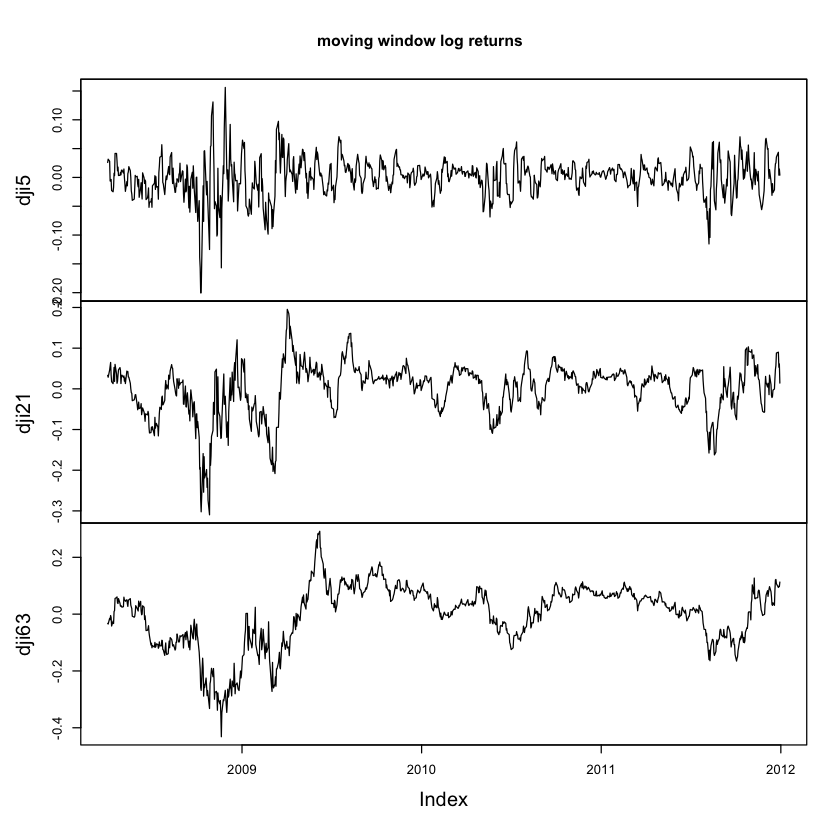

In [49]:
## moving window returns

## prepare data
djx<- diff(log(DJ["2008-01-01::2011-12-31",]))[-1]

djx5 <- rollapplyr(djx, width = 5, FUN = sum)[-(1:4)] # 5-days return ~(weekly)
                                                      #remove first 5 NA valus
djx21 <- rollapplyr(djx, width = 21, FUN = sum)[-(1:20)] # 21-days return ~(monthly)

djx63 <- rollapplyr(djx, width = 63, FUN = sum)[-(1:62)] # 21-days return ~(trimestre)

djx2  <- merge(djx5, djx21, djx63, all=FALSE)
colnames(djx2) <- c("dji5", "dji21", "dji63")
plot.zoo(djx2, main="moving window log returns")

## check skewness, kurtosis  for a weekly, mohtly and trimestrial returns
print('skewness')
apply(djx2, MARGIN=2, function(v){skewness(v,na.rm=TRUE)})
print('kurtosis')
apply(djx2, MARGIN=2, function(v){kurtosis(v,na.rm=TRUE)})
print('jarque-bera test')
apply(djx2, MARGIN=2, function(v){jarque.test(v)} )





### Student t distribution


![title](img/t-student-formula.png)


better suited for shorter period  log-returns

* has 3 params $\mu$, $\sigma$, $\nu$  : degree of freedoms
* smaller value of $\nu$ give fatter tails
* large $\nu$  tends to normal distribution

Method of maximum likelyhood (ML)

fit.st() in QRM


          nu           mu        sigma 
2.4282372018 0.0005694119 0.0092942822 


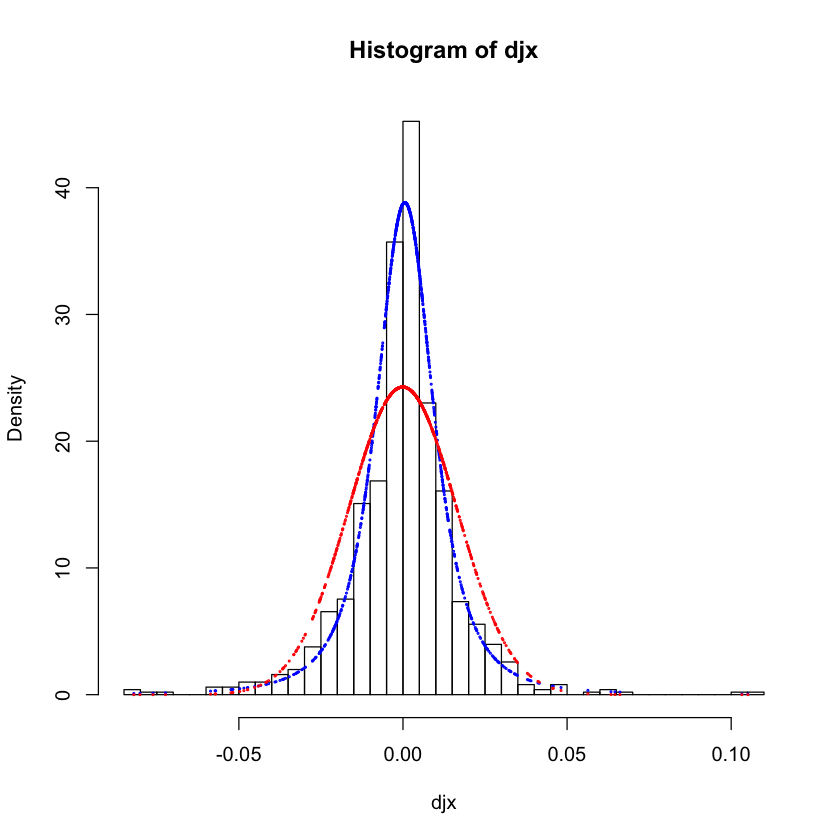

In [50]:
## fitting T-distribution data
library(QRM)
dj_x <- diff(log(DJ["2008-01-01::2011-12-31",]))[-1]
djx <- as.numeric(dj_x)

tfit <- fit.st(djx)  # fit.st is from from QRM
tpars <- tfit$par.ests
print(tpars) #estima
nu<- tpars[1]
mu<- tpars[2]
sigma <- tpars[3]

hist(djx, nclass=40, probability = TRUE )
yvals <-  dt( (djx - mu)/sigma, df =nu )/sigma
points( djx, yvals, col="blue", cex=0.2) # t-student is blue
points(djx, dnorm(djx,mean=mean(djx),sd=sd(djx)), col = "red", cex=0.2) # normal for comparison


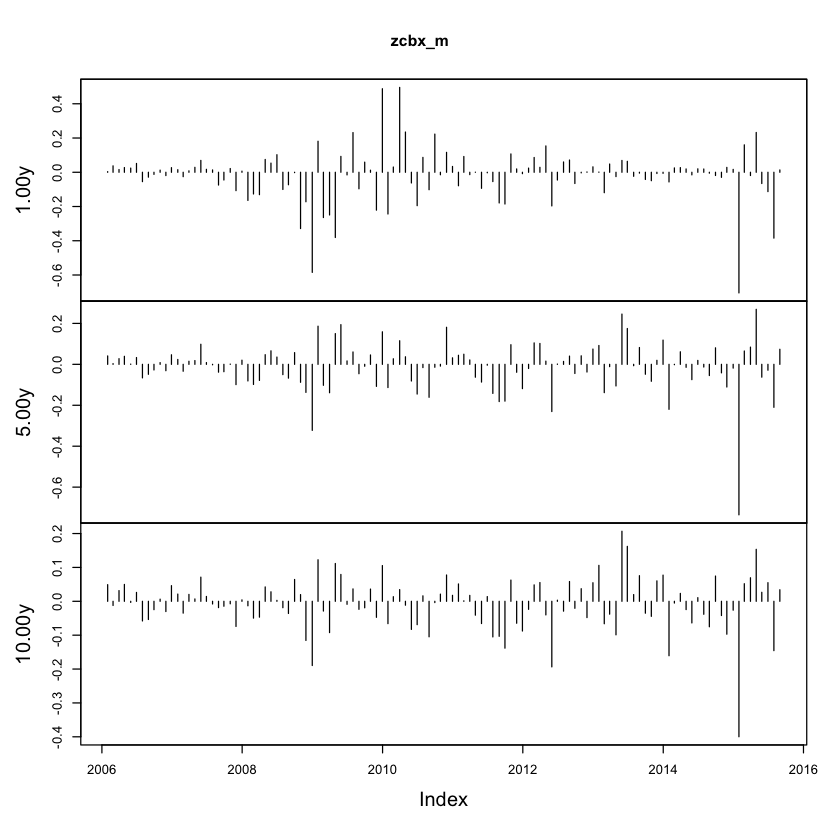

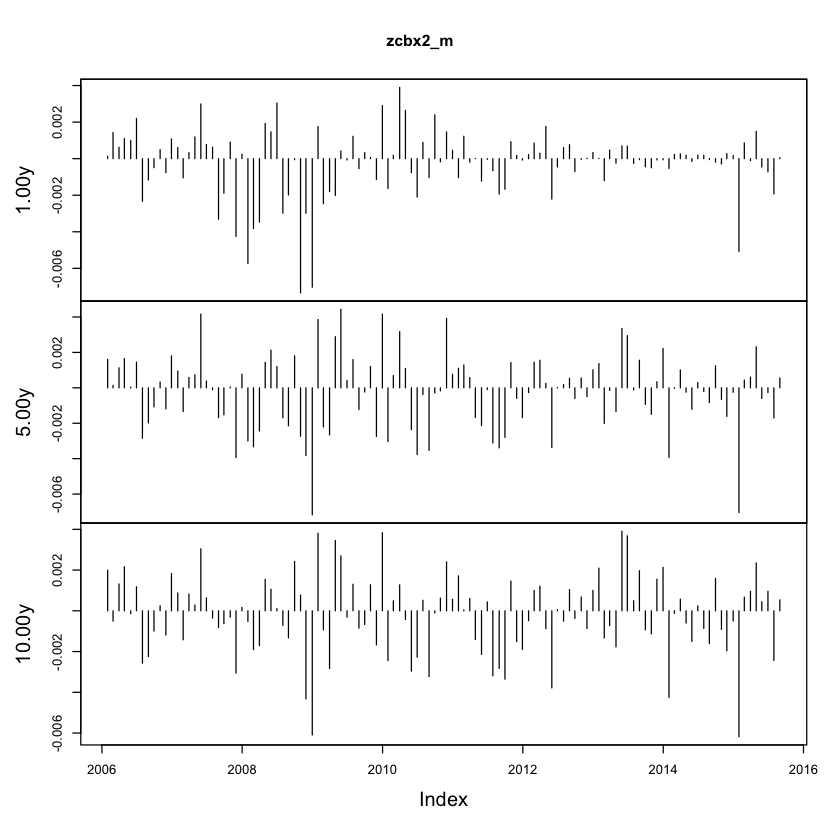

1.00y     5.00y    10.00y 
 8.597562 13.891654  7.991542

1.00y    5.00y   10.00y 
6.107231 3.728619 3.511835

$`1.00y`

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 164.96, p-value < 2.2e-16
alternative hypothesis: greater


$`5.00y`

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 644.21, p-value < 2.2e-16
alternative hypothesis: greater


$`10.00y`

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 142.27, p-value < 2.2e-16
alternative hypothesis: greater



$`1.00y`

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 77.596, p-value < 2.2e-16
alternative hypothesis: greater


$`5.00y`

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 5.7135, p-value = 0.05746
alternative hypothesis: greater


$`10.00y`

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 4.0954, p-value = 0.129
alternative hypothesis: greater



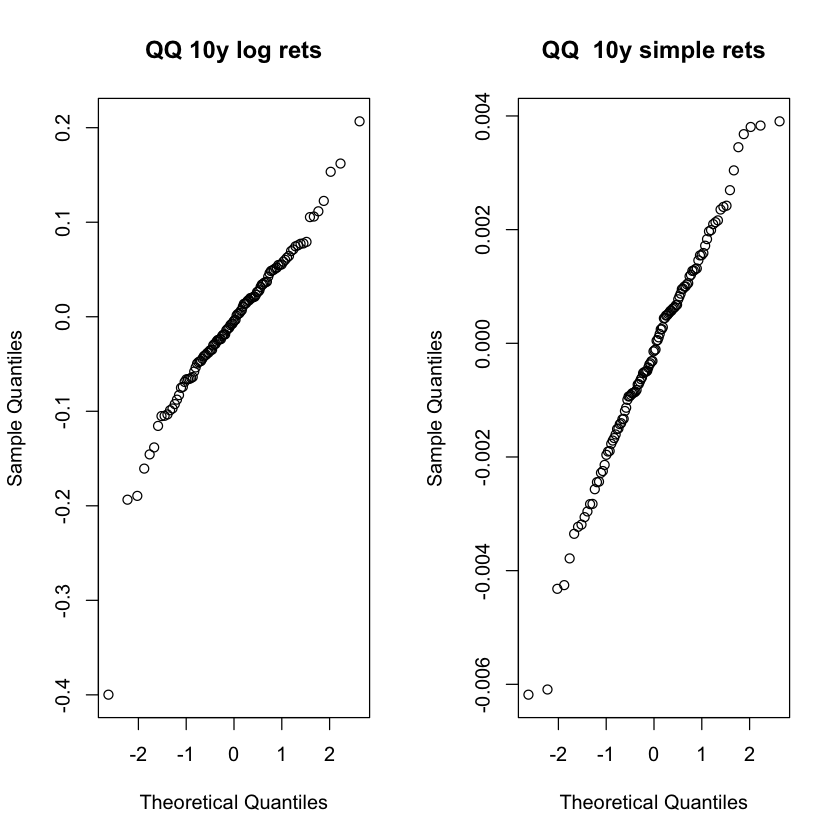

In [51]:
## test interest rates for normality

#prepare data
zcb <- ZCB_CA["2006::",]

yield_cols <- c("1.00y", "5.00y", "10.00y")
                
 #daily log returns 1,5,10 y
zcb_x <- diff(log(ZCB_CA["2006::",yield_cols]))[-1] #log returns
zcbx_m <- apply.monthly(zcb_x, colSums)
                
#daily simple returns 1,5,10
zcb_x2 <- diff(ZCB_CA["2006::",yield_cols])[-1]   # simple returns
zcbx2_m <- apply.monthly(zcb_x2, colSums)
## ddata done 

plot.zoo(zcbx_m, type="h")
plot.zoo(zcbx2_m, type="h")


par(mfrow=c(1,2))
qqnorm(zcbx_m[,3], main="QQ 10y log rets")
qqnorm(zcbx2_m[,3],  main="QQ  10y simple rets")
par(mfrow=c(1,1))

# Compute the kurtosis of each series in zcbx_m and zcbx2_m
apply(zcbx_m, MARGIN=2, FUN=kurtosis)
apply(zcbx2_m, MARGIN=2, FUN=kurtosis)
## as we see kurtosis seems to be lowr for simple returns

# Conduct the Jarque-Bera test on each series in zcbx_m and zcbx2_m
apply(zcbx_m, MARGIN=2, FUN=jarque.test)
apply(zcbx2_m, MARGIN=2, FUN=jarque.test)
## as we see  jarque-bera seems to be lower for smple returns 
## i.e. they are less non-normal


	Jarque-Bera Normality Test

data:  goldxq
JB = 35.01, p-value = 2.498e-08
alternative hypothesis: greater


         nu          mu       sigma 
9.917564937 0.009973518 0.059102516 


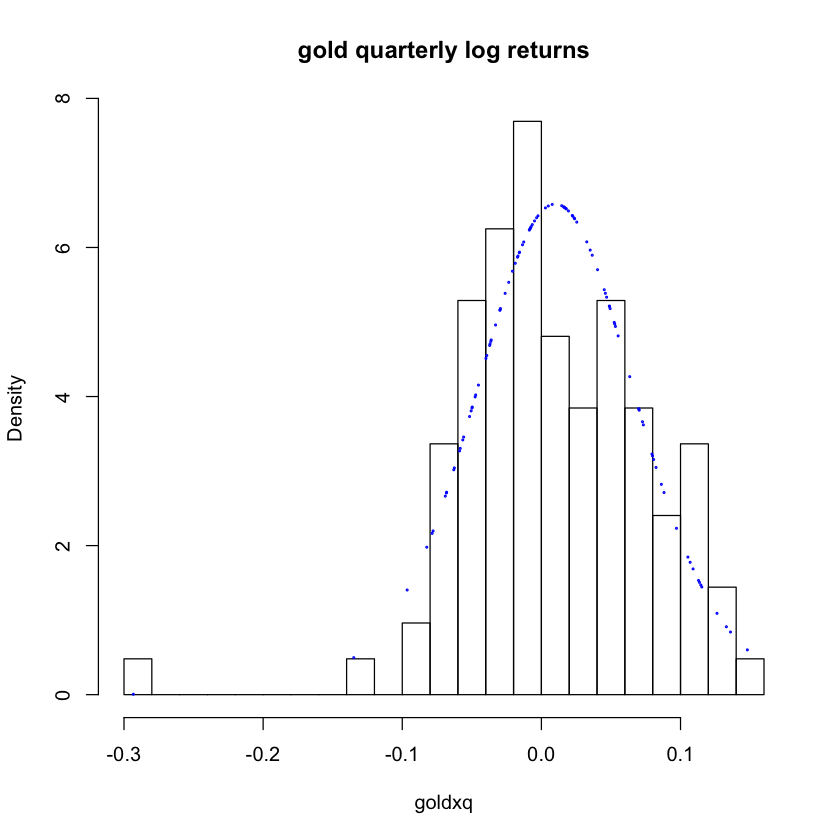

In [52]:
##### test gold for normality, fit t-student
#prepare data
goldx<-diff(log(GOLD["1990::",]))[-1]
goldx_q <- apply.quarterly(goldx,sum)
#data done

goldxq <- as.numeric(goldx_q)
jarque.test(goldxq)
#as we see jarque shows that quaterly returns are still far from normal

tfit <- fit.st(goldxq)
tpars <- tfit$par.ests
print(tpars) #estimate t-student params
nu<- tpars[1]
mu<- tpars[2]
sigma <- tpars[3]
hist(goldxq, nclass=20, probability = TRUE,  main="gold quarterly log returns" )
yvals <-  dt( (goldxq - mu)/sigma, df =nu )/sigma
points( goldxq, yvals, col="blue", cex=0.2) # t-student is blue


## Chapter 3  Real world returns are volatile and correlated

* Can financial returns be modeled as independent and identically distributed (iid) series
* Random walk model for log asset prices
* Real returns often show **volatility clustering**



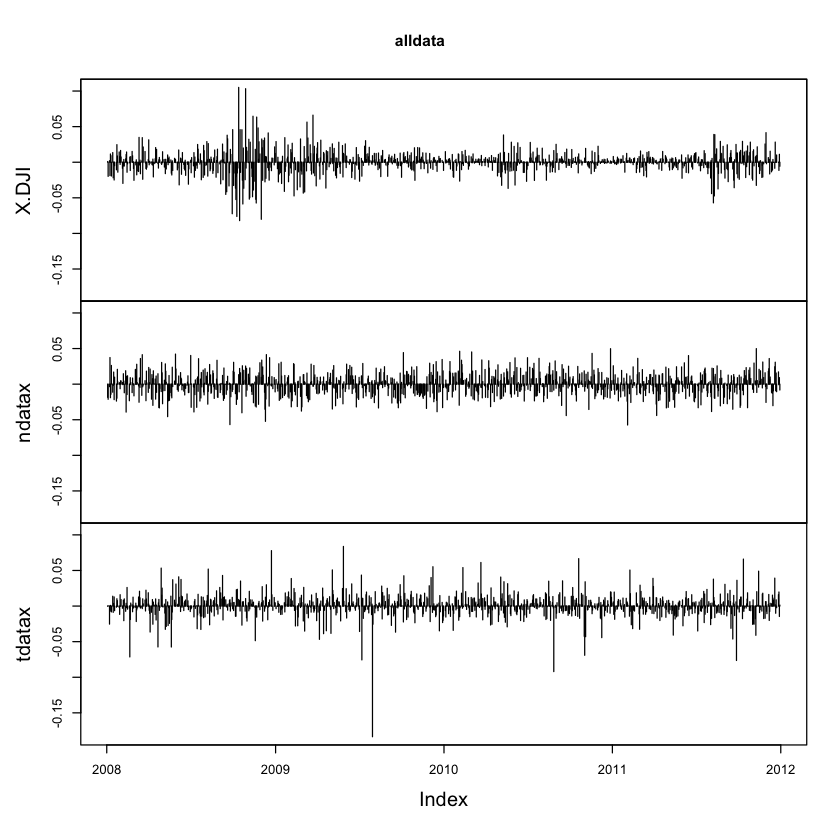

In [53]:
##how to generate a normal and t-distributed sample with specified means
# data is dowjones  log returns dj_x
n <- length(dj_x)
#for normal
npars <- list(mu=mean(dj_x), sigma=sd(dj_x))
#for t-student
tfit <- fit.st(dj_x)
tfpars <- tfit$par.ests
tpars <- list(nu=tfpars[1],mu=tfpars[2], sigma=tfpars[3])

#  Generate a normal sample of size n with parameters given by npars
ndata <- rnorm(n)*npars$sigma + npars$mu 
# Generate a t-distributed sample of size n with paramaters given by tpars
tdata <- rt(n, df = tpars$nu)*tpars$sigma + tpars$mu

ndatax <- xts(ndata, time(dj_x))
tdatax <- xts(tdata, time(dj_x))
alldata <- merge(dj_x, ndatax,tdatax)
plot.zoo(alldata, type="h", ylim = range(alldata))


#### Estimated serial correlations

* serial correlations can be used for predictions. 

* Sample autocorrelation funtion (acf)  measures correlation

* Stationary is implicitly assumed
    * Expected return constant
    * variance of returns constant
    * Correlation betwen returns k points apart always the same
    
$\widehat{\rho}(k)$ 

`acf(ftse)
acf(abs(ftse))` 
on absolute value correlation 


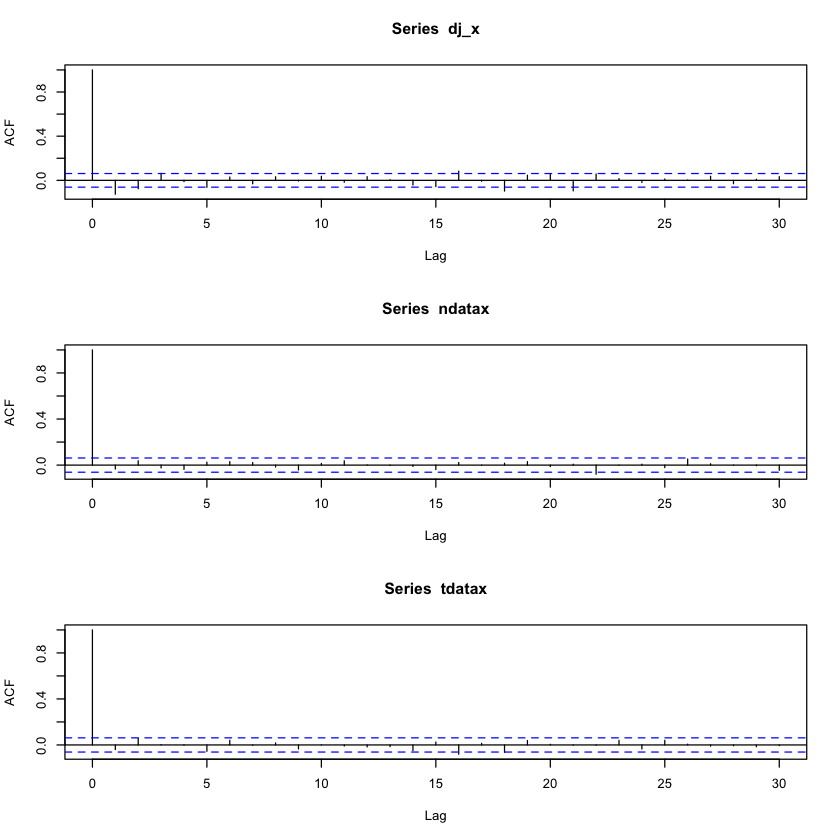

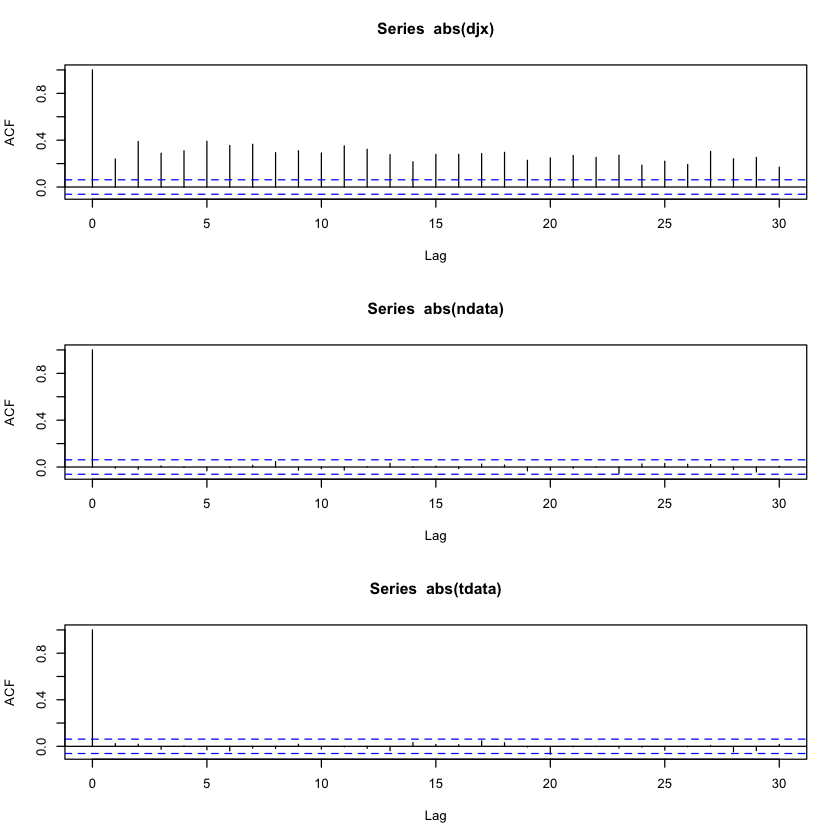

In [54]:
## lets see autocorrelations
ndatax <- xts(ndata, time(dj_x))
tdatax <- xts(tdata, time(dj_x))
alldata <- merge(dj_x, ndatax,tdatax)

par(mfrow = c(3, 1))

acf(dj_x)
acf(ndatax)
acf(tdatax)

# Plot the acfs of the absolute values
acf(abs(djx))  ## see how autocorr on log returns  is important
acf(abs(ndata))
acf(abs(tdata))


###  Ljung-box test ###

* iid has  0 value for test (no correlation * 

* ljun-box should be done on log_return  and on abs(log_return)

Ljung-Box  on longer intervals  shows  weaker auto-correlation


In [55]:
Box.test(dj_x, lag = 10, type="Ljung")
Box.test(abs(dj_x), lag = 10, type="Ljung")  # on dj_x abs values

print('on monthly data')
### we observe that LJUN-box is lower i.e longer period returns are closer to iid.
djx_m <- apply.monthly(dj_x, sum)  
Box.test(djx_m, lag = 10, type="Ljung")
Box.test(abs(djx_m), lag = 10, type="Ljung")  # on dj_x abs values





	Box-Ljung test

data:  dj_x
X-squared = 34.552, df = 10, p-value = 0.0001489



	Box-Ljung test

data:  abs(dj_x)
X-squared = 1082.9, df = 10, p-value < 2.2e-16


[1] "on monthly data"



	Box-Ljung test

data:  djx_m
X-squared = 22.057, df = 10, p-value = 0.01481



	Box-Ljung test

data:  abs(djx_m)
X-squared = 12.89, df = 10, p-value = 0.2299


### Extreme values in  log-return series 


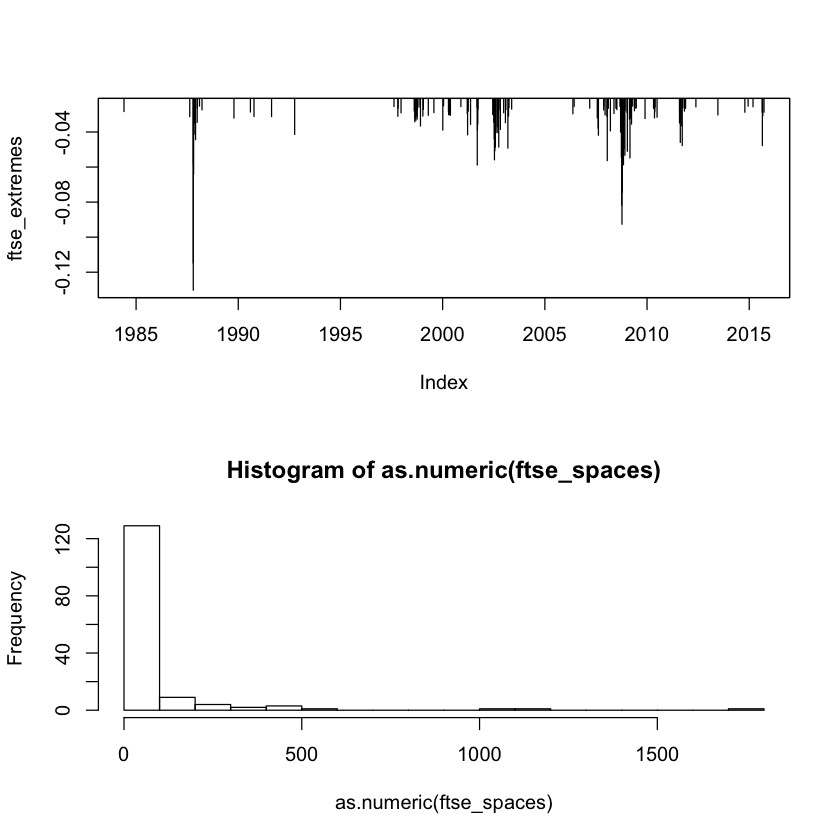

In [56]:
data(FTSE)
ftse <- diff(log(FTSE))[-1]  # all available data daily
ftse_losses <- -ftse 
ftse_extremes <- ftse[ftse < -0.025]

#compute spaces in days between extreme values
ftse_spaces <- diff(time(ftse_extremes))

par(mfrow=c(2,1))
plot.zoo(ftse_extremes, type = "h") 
hist(as.numeric(ftse_spaces),nclass=20) # chart and histogram shows a clustring of days
                                        # with extreme values

,dj,ftse,smi
dj,1.0000000,0.5903734,0.5411898
ftse,0.5903734,1.0000000,0.8228079
smi,0.5411898,0.8228079,1.0000000


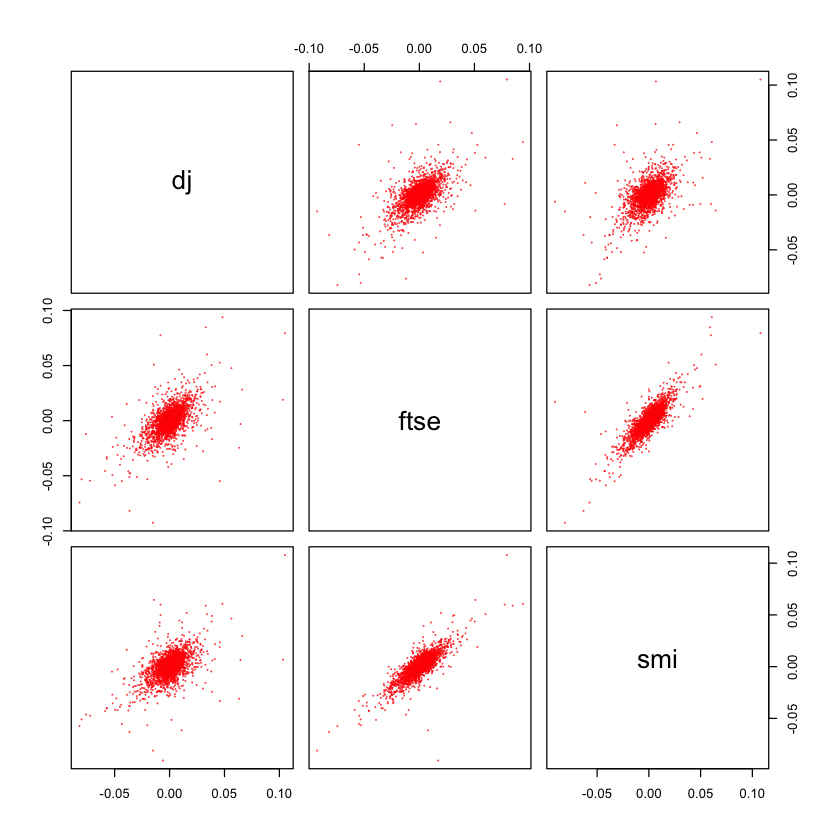

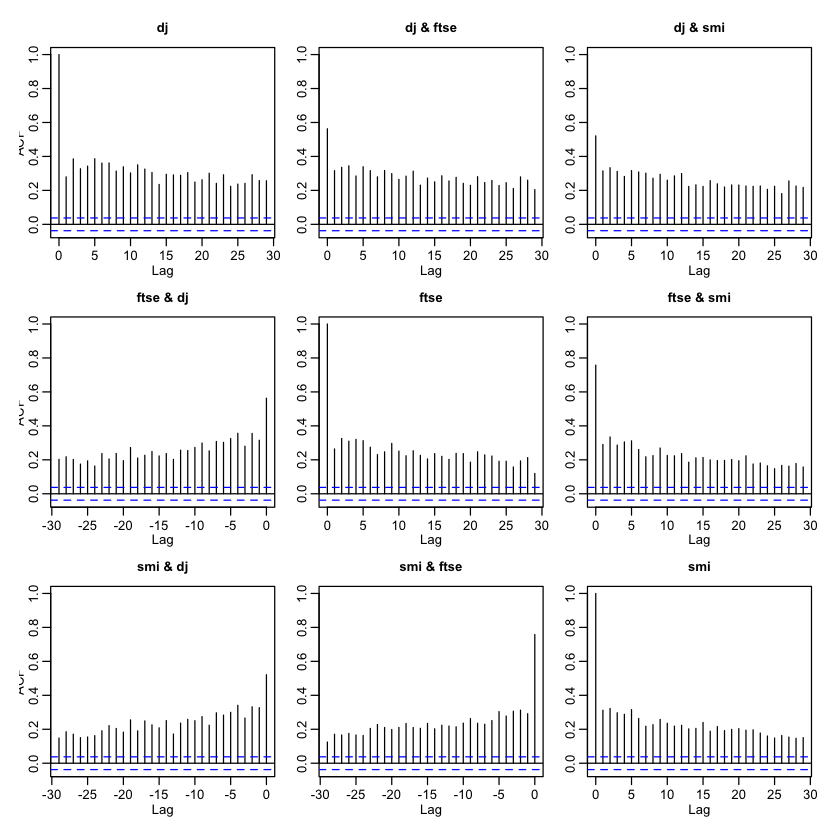

In [57]:
### cross correlation of indexes
#prepare data
data("SMI")
dj_x <- diff(log(DJ["2005/2015",]))[-1]
ftse_x <- diff(log(FTSE["2005/2015",]))[-1]
smi_x <- diff(log(SMI["2005/2015",]))[-1]
indexes<-cbind(dj_x, ftse_x, smi_x)
colnames(indexes)<-c("dj", "ftse", "smi")
#cleaning   off NA values
indexes = na.omit(indexes)
## data ok

##correlation plotting
pairs(as.zoo(indexes), cex=0.1, col=2)
## correlation matrix
cor(indexes)
#acf on absolute values
acf(abs(indexes))


## Stylized facts of return series

![title](img/style_facts.png)

# Chapter 4  Estimate portfolio value at risk

* consider distribution of losses over a fixed period (day, week, etc)
* $\alpha$-VaR is the $\alpha$-quantile or a confidence level of the loss distribution
* Portfolio should lose no more than $\alpha$-VaR with probability $\alpha$

[1] "var: 0.0470131401138582 eshortfall: 0.0537965971321622"

[1] "as we see Var is > than 2 * sigma"

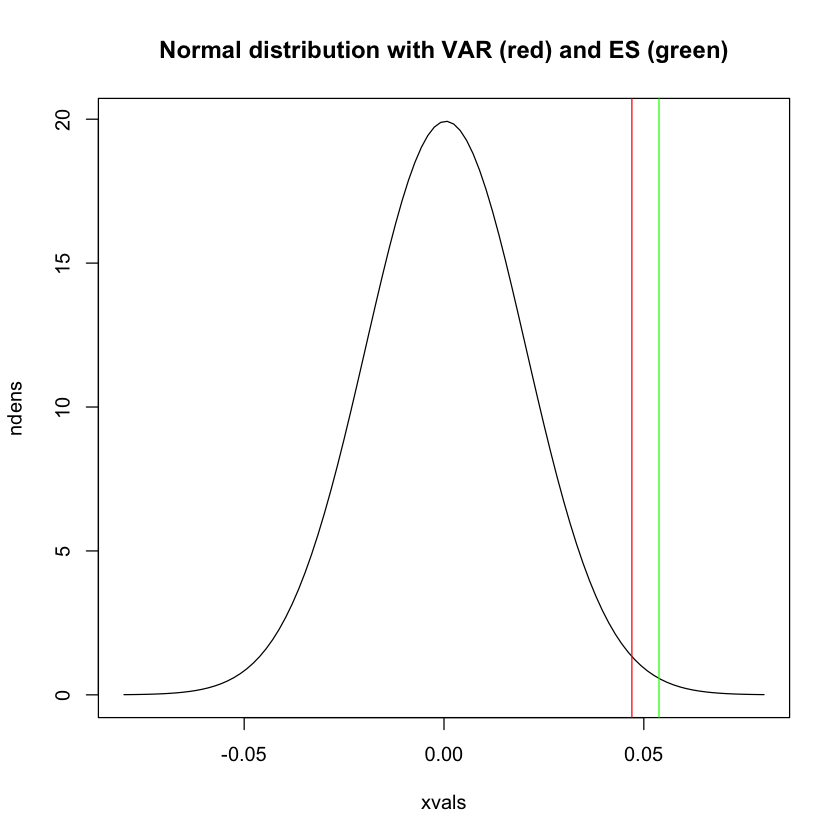

In [58]:
##computing VAR and ES for a normal distribution
require(QRM)
mu <- 0.000444099
sigma <- 0.02001809
#going from -4*sigma to 4*sigma
xvals <- seq(from = -4*sigma, to = 4*sigma, length.out = 100)

# Compute the density of a N(mu, sigma^2) distribution at xvals
ndens <- dnorm(xvals, mean = mu, sd = sigma)

# Plot ndens against xvals
plot(xvals,ndens,type="l", main="Normal distribution with VAR (red) and ES (green)")

# Compute the 99% VaR and 99% ES of a N(mu, sigma^2) distribution
VaR99 <- qnorm(0.99, mean=mu, sd=sigma)
ES99  <- ESnorm(0.99, mu=mu, sd=sigma)

# Draw vertical lines at VaR99 and ES99 in red and green
abline(v = VaR99, col = "red")
abline(v = ES99, col = "green")

paste("var:", VaR99, "eshortfall:", ES99)
paste("as we see Var is > than 2 * sigma")

### International equity portfolio for a UK investor

#### Examining risk factors 

* allocation: 30% ftse, 40% S&P 30% SMI
* 5 risk factors,  ftse, sp500, smi, gbp/usd,  gbp/chf

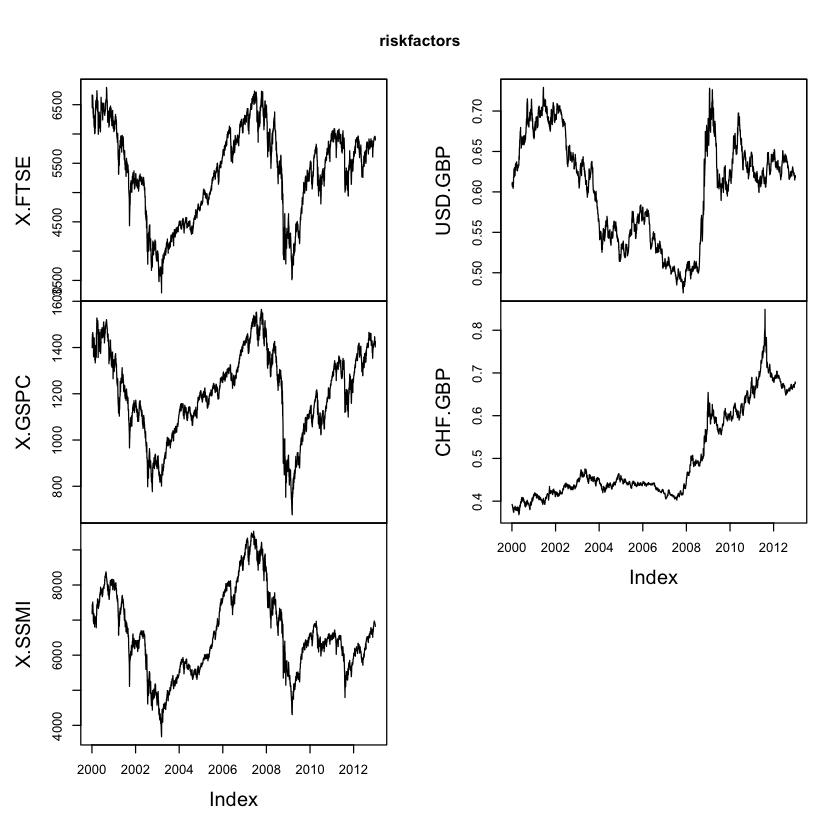

$X.FTSE

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 4209.4, p-value < 2.2e-16
alternative hypothesis: greater


$X.GSPC

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 6961.6, p-value < 2.2e-16
alternative hypothesis: greater


$X.SSMI

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 5158.1, p-value < 2.2e-16
alternative hypothesis: greater


$USD.GBP

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 2586.4, p-value < 2.2e-16
alternative hypothesis: greater


$CHF.GBP

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 7759.2, p-value < 2.2e-16
alternative hypothesis: greater



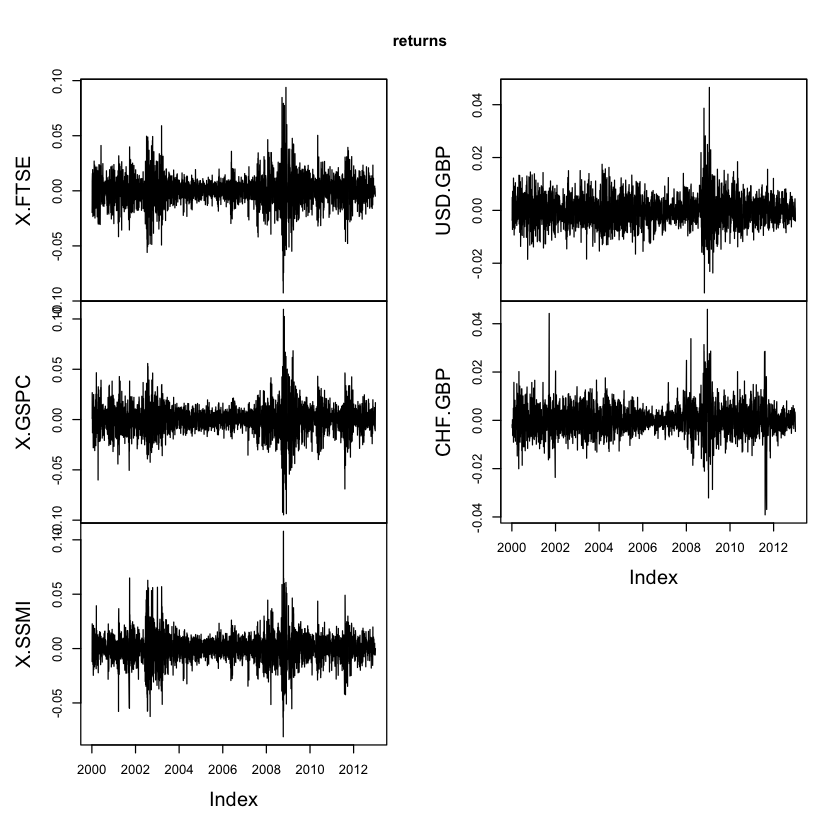

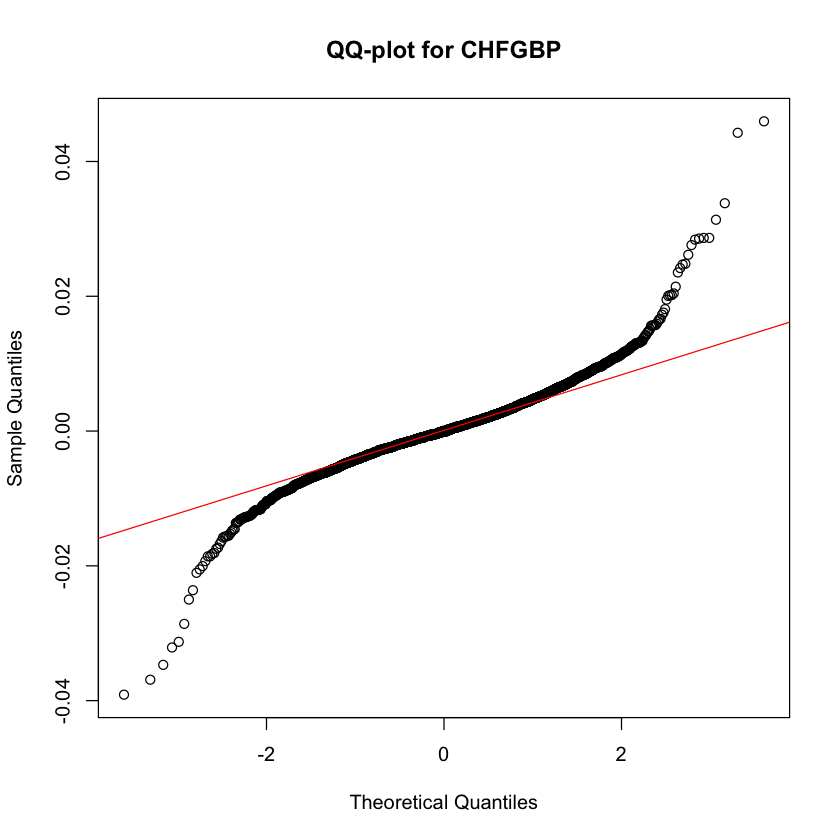

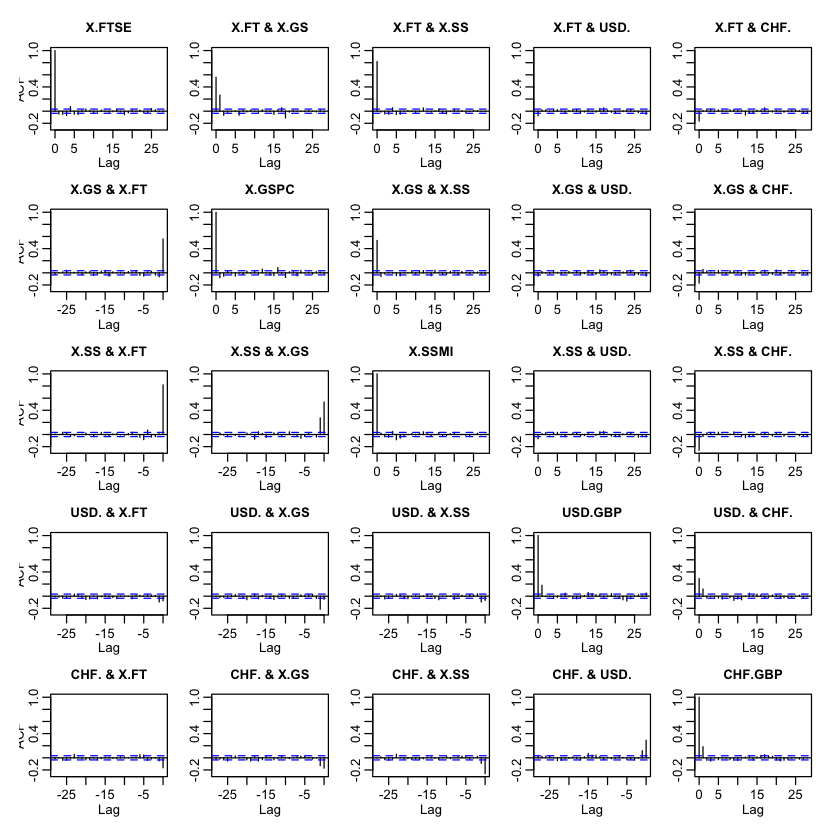

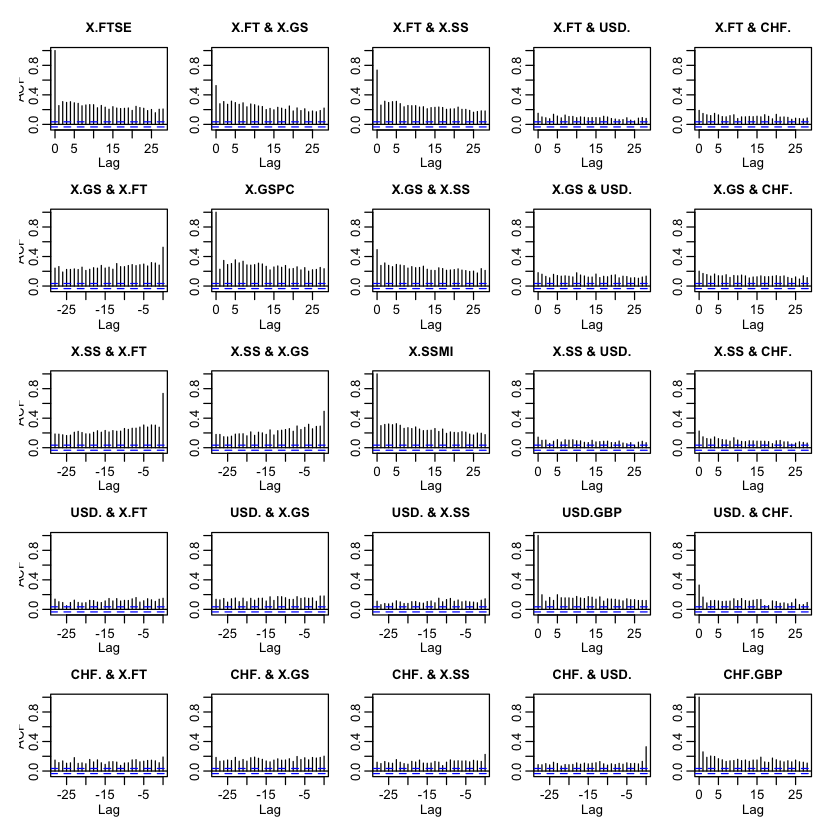

In [59]:
##### UK portfolio  30% ftse, 40% S&P 30% SMI
data("USD_GBP")
data("CHF_GBP")
riskfactors<-merge(FTSE,SP500,SMI,USD_GBP,CHF_GBP, all=FALSE) # rmoves NAs
riskfactors <- riskfactors["2000::2012",] ## get a period between 2000 and 2012
plot.zoo(riskfactors)
returns <- diff(log(riskfactors))[-1,]
plot.zoo(returns)


## jarq.test
apply(returns, FUN=jarque.test, MARGIN=2)

##check the normality of returns
qqnorm(returns[,5], main="QQ-plot for CHFGBP")
qqline(returns[,5],col=2)

## picture of hte acfs of returns and abs returns
# auto and cross covariance and correlation function estimation
acf(returns)
acf(abs(returns))


[1] "lossop operator on 1 day of 5 riskfactors returns of -0.1 0.155437247434625"

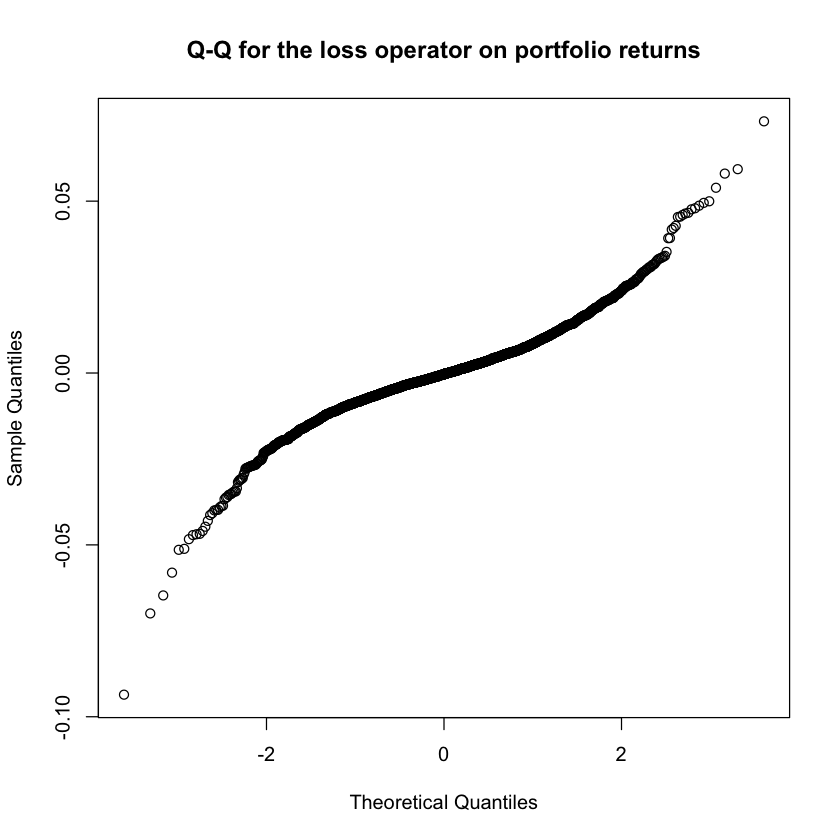

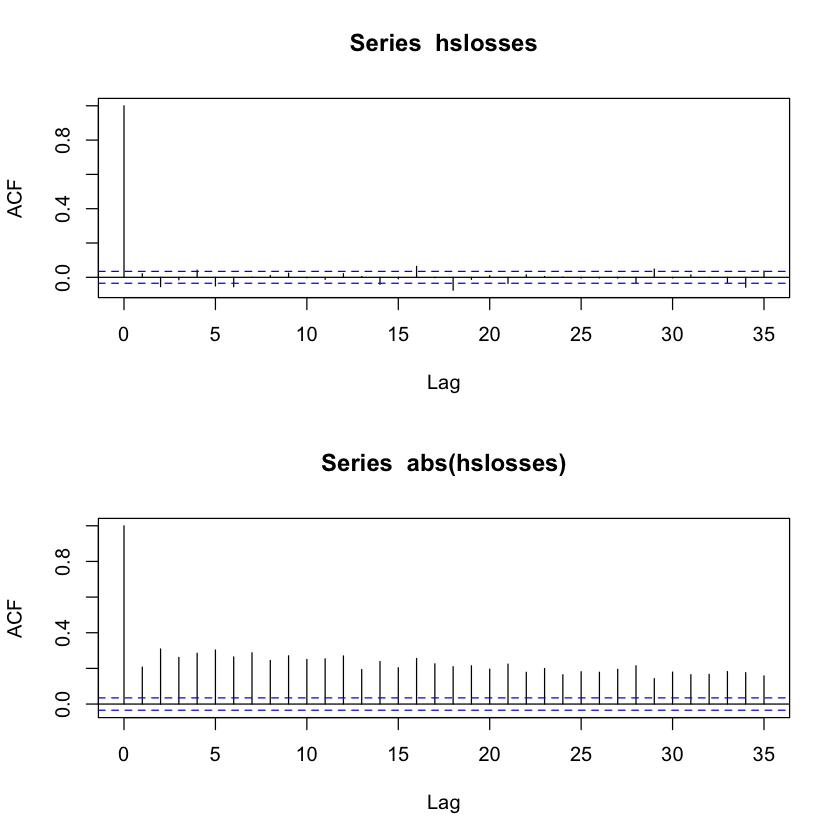

In [60]:
### Historical simulation
# we write a function lossop() is the so-called loss operator for the portfolio
#and has been specially written for this exercise. In general, for each new portfolio,
#a specific function has to be written to compute portfolio losses and gains.

lossop<-function(xseries,wts=c(0.3,0.4,0.3)){  # wts is a vector of weights
  if (is.xts(xseries))
    x <- coredata(xseries)
  else if (is.matrix(xseries))
    x <- xseries
  else
    x <- matrix(xseries,nrow=1)
  ## apply a function on matrix rows
  ll <- apply(x,1,
              function(x,wts){
                ## this expression is key
                1-(wts[1]*exp(x[1]) + wts[2]*exp(x[2]+x[4]) + wts[3]*exp(x[3]+x[5]))
              },wts=wts)
  
  if (is.xts(xseries))
    ll <- xts(ll,time(xseries))
  return(ll)
}

# Calculate the loss from a log-return of -0.1 for all risk factors
paste("lossop operator on 1 day of 5 riskfactors returns of -0.1",lossop(rep(-0.1, 5)))
# Apply lossop() to returns and plot hslosses
hslosses <- lossop(returns)
# Form a Q-Q plot of hslosses against normal
qqnorm(hslosses, main="Q-Q for the loss operator on portfolio returns")


# Plot the sample acf of hslosses and their absolute values
par(mfrow=c(2,1))
acf(hslosses)
acf(abs(hslosses))


In [61]:
#Now estimating the 99% var from non-parametric approach
#and compare it assuming that hslosses is normally distributed 

paste("non-parametric method")
# Estimate the 99th sample percentile of the distribution of hslosses
paste("var 99%:", quantile(hslosses,0.99))

# Estimate the 99% ES
paste("ES 99%:", mean(hslosses[hslosses >= quantile(hslosses, 0.99)]) )

paste("assuming hslosses is normally distributed")
# Estimate the mean and standard deviation of hslosses

mu<-mean(hslosses)
sigma <- sd(hslosses)

# Compute the 99% quantile of a normal distribution
paste("norm var 99%", qnorm(0.99, mean=mu, sd=sigma))

# Compute the 99% ES of a normal distribution
paste("norm ES 99%",ESnorm(0.99,mu=mu, sd=sigma))


[1] "non-parametric method"

[1] "var 99%: 0.0307617300345223"

[1] "ES 99%: 0.0418465532311258"

[1] "assuming hslosses is normally distributed"

[1] "norm var 99% 0.0260297257375155"

[1] "norm ES 99% 0.029839791651781"

## Portfolio with options
#### Black-Scholes

In [68]:
## pricing basic call, puts using classic blackSholes formula  in qrmtools package
require(qrmtools)

args(Black_Scholes)
##print the body of func
Black_Scholes
K<-100 # strike
r<-0.01 #annualized free-risk interest rate
sigma<-0.20 #annualized vola

paste("Price a European call option that matures in one year if the current stock price is 80,
T=1 i.e. option expiry is in 1 year")
Black_Scholes(t=0, S=80, r=r, sigma=sigma, K=K, T=1, type="call")
# Price a European call option that matures in one year if the current stock price is 120
Black_Scholes(0, 120, r, sigma, K, 1, "call")

paste("pricing puts")
# Price a European put option that matures in one year if the current stock price is 80
Black_Scholes(0, 80, r, sigma, K, 1, "put")

# Price a European put option that matures in one year if the current stock price is 120
Black_Scholes(0, 120, r, sigma, K, 1, "put")

function (t, S, r, sigma, K, T, type = c("call", "put")) 
NULL

function (t, S, r, sigma, K, T, type = c("call", "put")) 
{
    d1 <- (log(S/K) + (r + sigma^2/2) * (T - t))/(sigma * sqrt(T - 
        t))
    d2 <- d1 - sigma * sqrt(T - t)
    type <- match.arg(type)
    switch(type, call = {
        S * pnorm(d1) - K * exp(-r * (T - t)) * pnorm(d2)
    }, put = {
        S * (pnorm(d1) - 1) + K * exp(-r * (T - t)) * (1 - pnorm(d2))
    }, stop("Wrong type"))
}
<bytecode: 0x7fbc083a92e0>
<environment: namespace:qrmtools>

[1] "Price a European call option that matures in one year if the current stock price is 80,\nT=1 i.e. option expiry is in 1 year"

[1] 1.302245

[1] 22.94188

[1] "pricing puts"

[1] 20.30723

[1] 1.94686

#### Implied Volatility,  VIX vs SP500

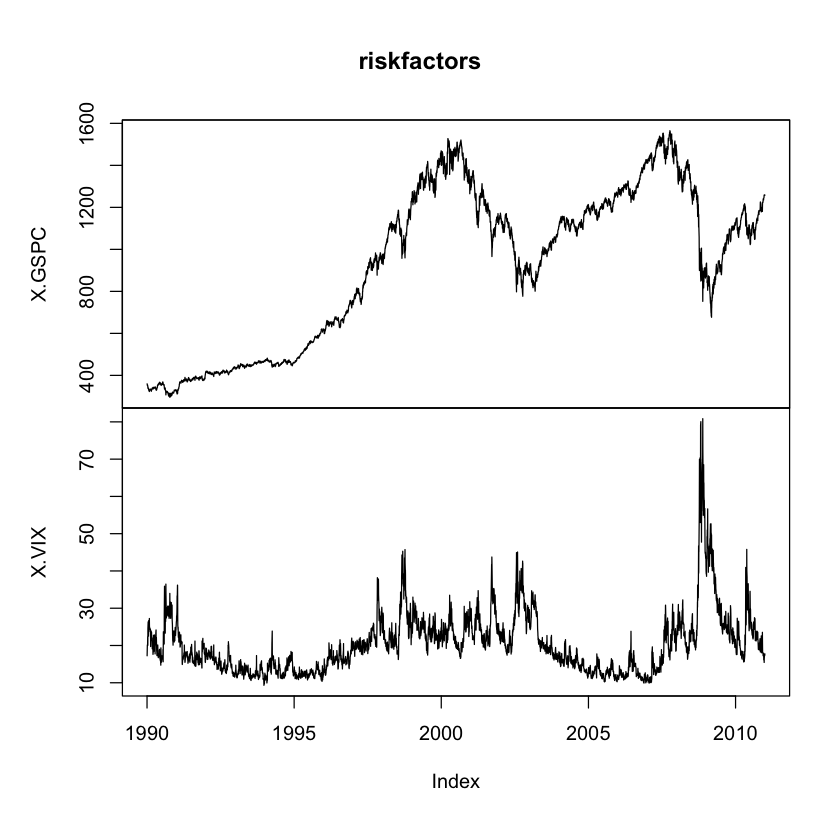

$X.GSPC

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 17397, p-value < 2.2e-16
alternative hypothesis: greater


$X.VIX

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 4412.6, p-value < 2.2e-16
alternative hypothesis: greater



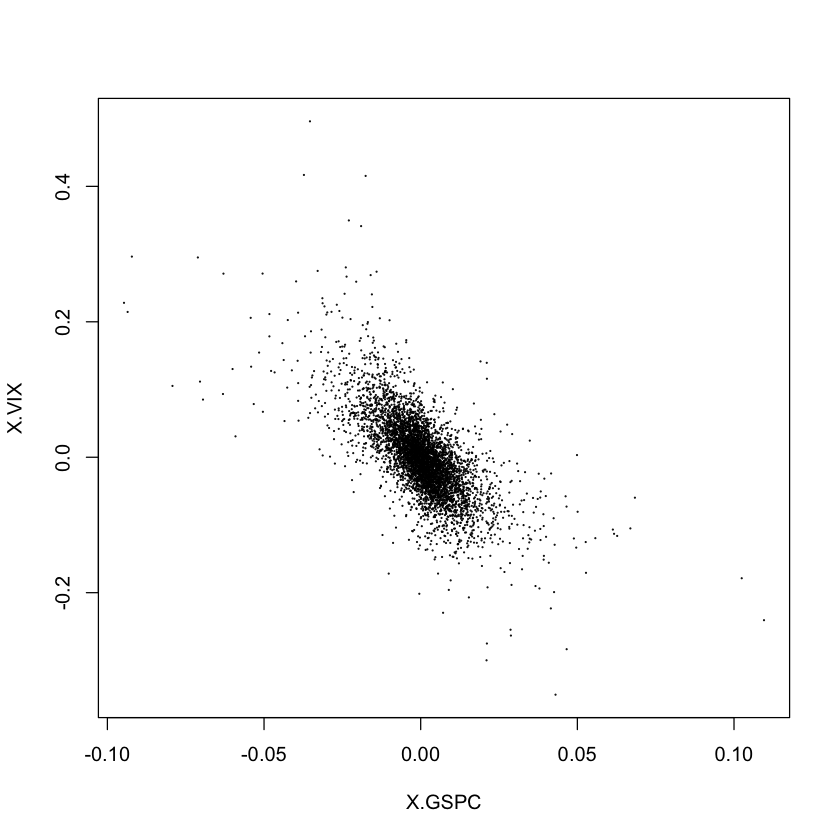

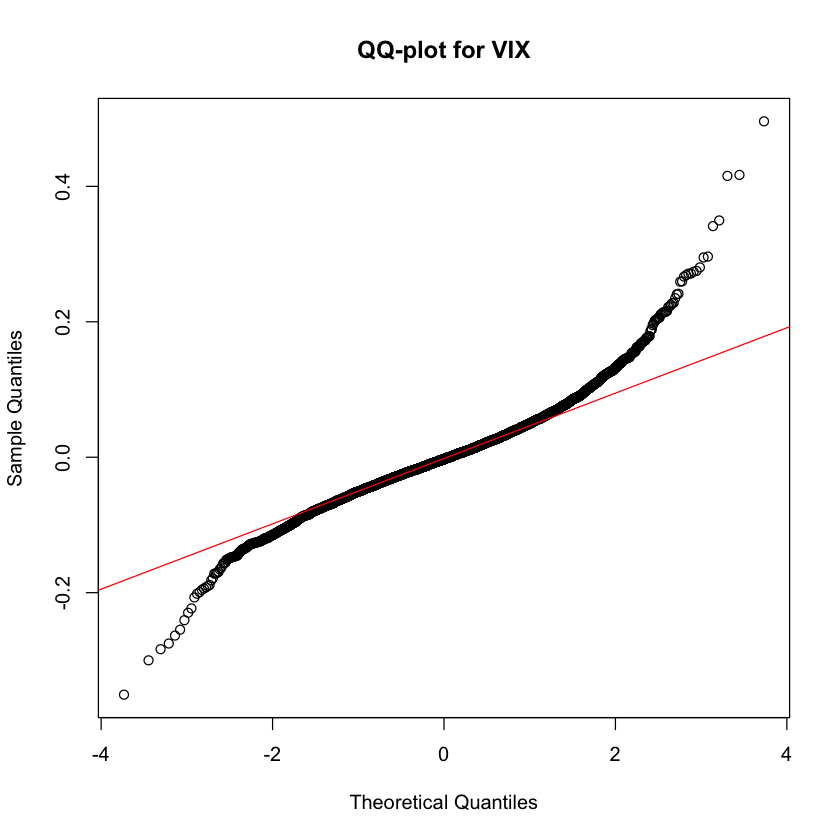

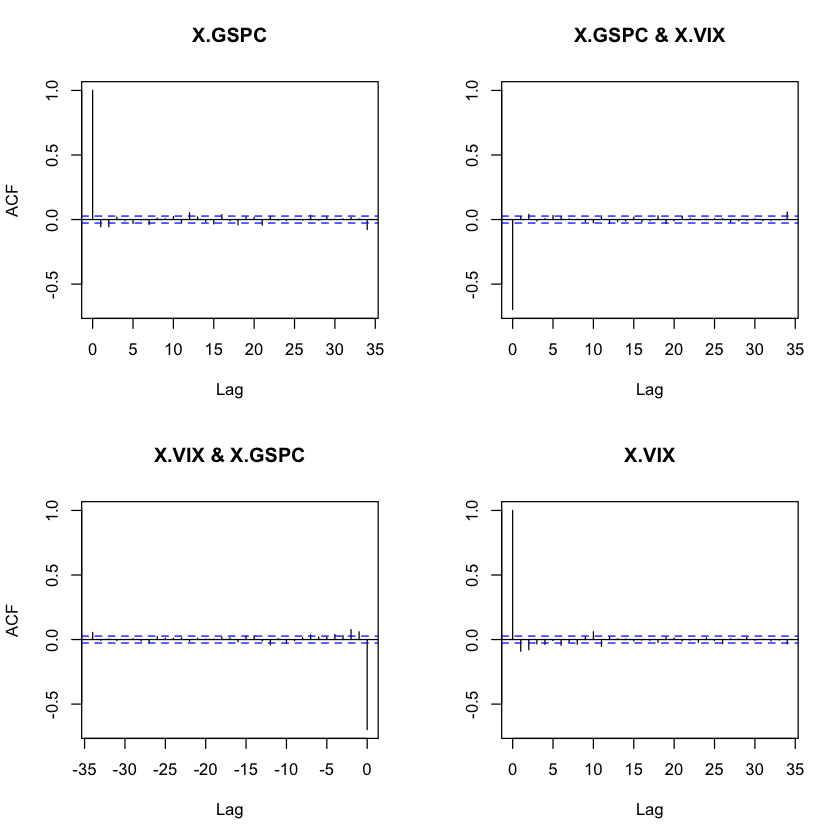

,X.GSPC,X.VIX
X.GSPC,1.0000000,-0.6978308
X.VIX,-0.6978308,1.0000000


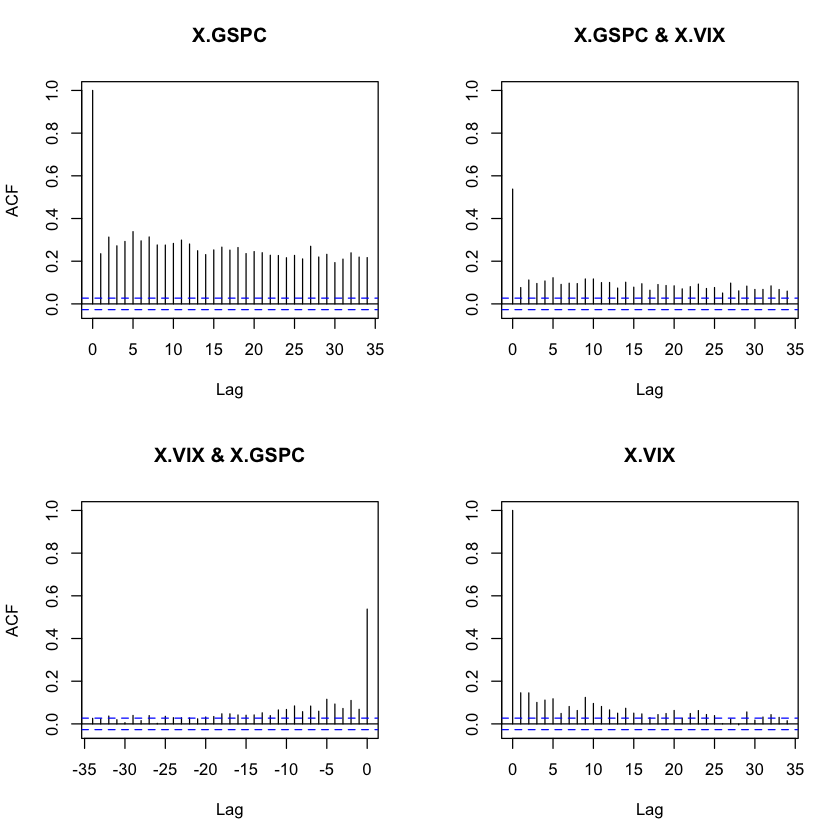

In [77]:
data("SP500")
data("VIX")

riskfactors <- merge(SP500,VIX, all=FALSE)["1990::2010"]
returns<-diff(log(riskfactors))[-1,]  
plot.zoo(riskfactors)

## basic form of pairs plot
plot(as.matrix(returns), cex=0.1)

## jarq.test
apply(returns, FUN=jarque.test, MARGIN=2)

#for large values of VIX we see very fat tailes
qqnorm(returns[,2], main="QQ-plot for VIX")
qqline(returns[,2],col=2)

#auto-correllaction
par(mfrow=c(1,2))
acf(returns)
#for VIX we observe less auto-correlation than for SP500
acf(abs(returns))

##correlation between VIX and SP500
cor(returns)



#### Lossop for a potfolio from a single option


[1] "examples of calculating portfolio loss for S=80 and S=100"

[1] 0.8030928

[1] 0.4380754

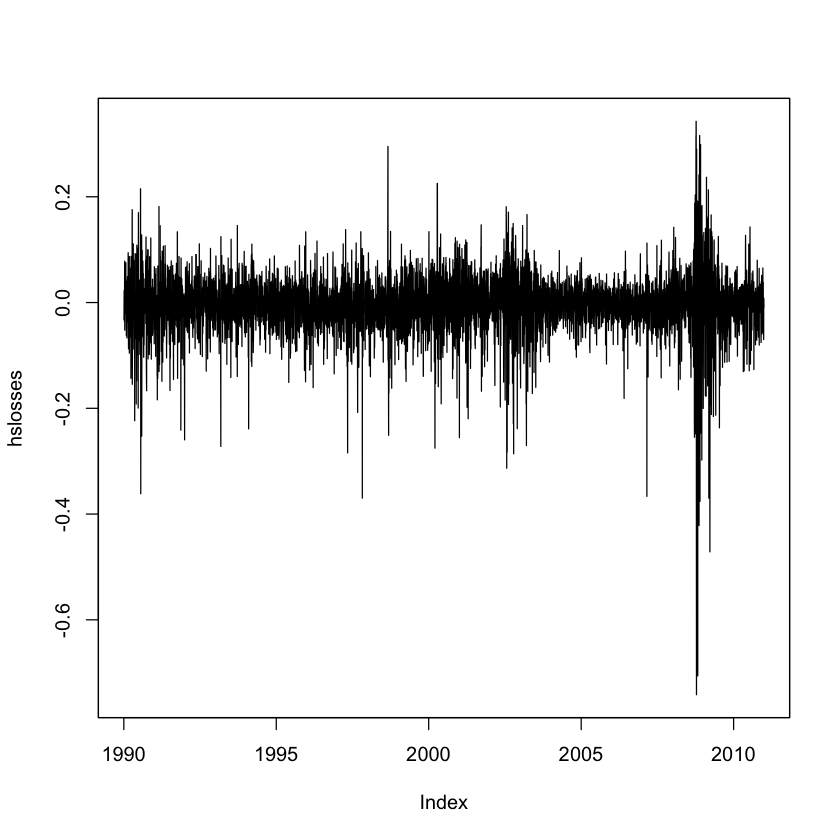

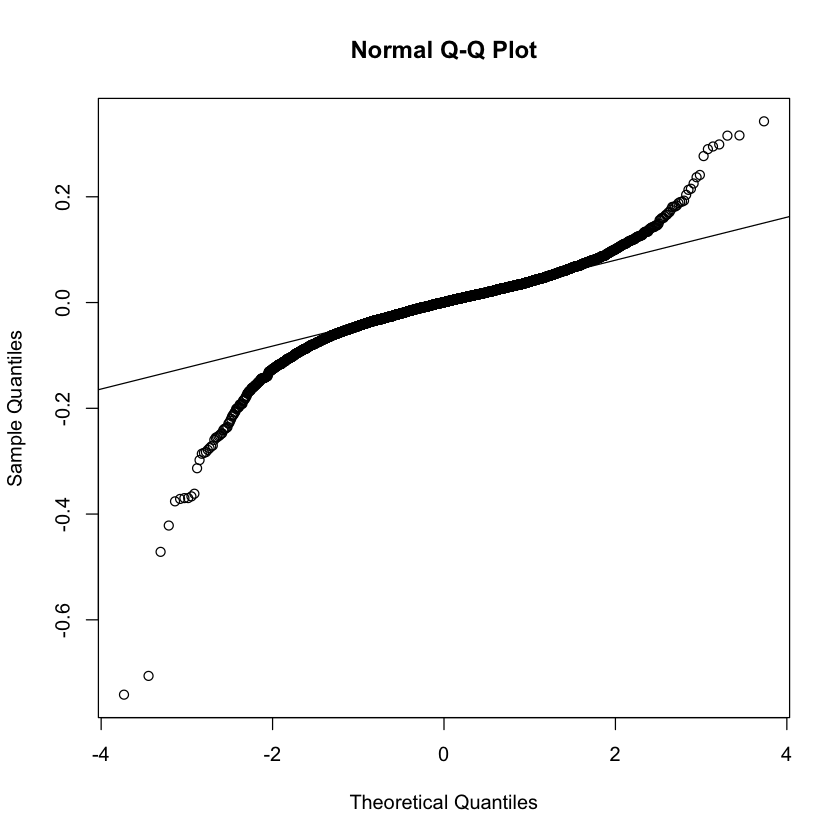

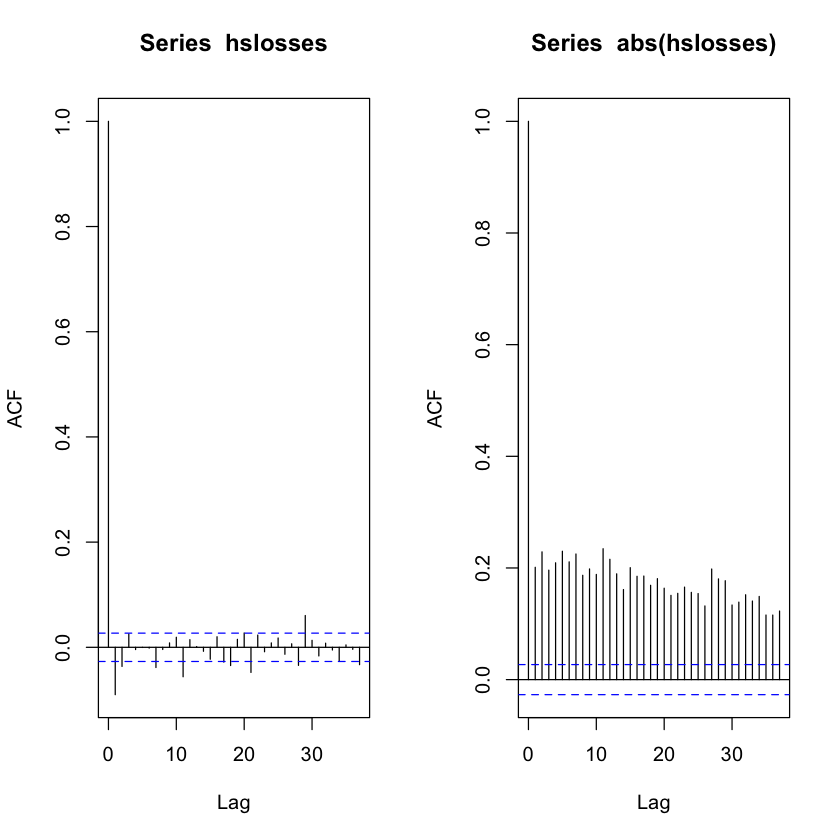

In [78]:
##lossop op for option portfolio
lossop <- function(xseries,r=0.01, K=100, T=1, sigma=0.2,S=100){
  if (is.xts(xseries))
    x <- coredata(xseries)
  else if (is.matrix(xseries))
    x <- xseries
  else
    x <- matrix(xseries,nrow=1)
  ll <- apply(x,MARGIN=1,
            function(x,r,K,T,sigma,S){
              deltat <- 1/250
              V_t0 <- Black_Scholes(t=0, S=S, r=r, sigma=sigma, K=K, T=T, type="call")
              V_t1 = Black_Scholes(t=deltat, S=exp(log(S)+x[1]), r=r, sigma=exp(log(sigma)+x[2]), K=K, T=T, type="call")
              return(- (V_t1 - V_t0)/V_t0) #this is a change of option value over 1 day
            },
            r=r,K=K,T=T,sigma=sigma,S=S)
  if (is.xts(xseries))
    ll <- xts(ll,time(xseries))
  return(ll)
}

# Calculate the first loss
paste("examples of calculating portfolio loss for S=80 and S=100")
lossop(c(-0.1,-0.1),S=80, sigma=0.2)

# Calculate the second loss
lossop(c(-0.1, 0.1), S=100, sigma=0.2)

# Create and plot hslosses
hslosses <- lossop(returns,sigma=0.2,S=100)

plot.zoo(hslosses)


# Form a Q-Q plot of hslosses against normal
qqnorm(hslosses)
qqline(hslosses)
# Plot the sample acf of raw data and absolute values in hslosses

par(mfrow=c(1,2))
acf(hslosses)
acf(abs(hslosses))

### Option portfolio VAR and ES on simulated losses
#### observe that assumption of normal distribution for losses underestimates VAR and ES

In [79]:
paste("non-parametric calculations from loss simulated data")
# Estimate the 99.5% percentile of the distribution
paste("99.5% VAR",quantile(hslosses, 0.995))

# Estimate the 99.5% ES
paste("99.5% ES from data",mean(hslosses[hslosses >= quantile(hslosses, 0.995)]))

paste("var and ES if losses are thought to be normally distributed")
# Estimate the mean and standard deviation of hslosses
mu<-mean(hslosses)
sigma<-sd(hslosses)

# Compute the 99.5% quantile of a normal distribution
paste("99.5% VAR from normal distribution",qnorm(0.995, mean=mu, sd=sigma))

# Compute the 99.5% ES of a normal distribution
paste("99.5 % ES from normal distribution",ESnorm(0.995, mu=mu, sd=sigma))


[1] "non-parametric calculations from loss simulated data"

[1] "99.5% VAR 0.16183763259085"

[1] "99.5% ES from data 0.221174291357158"

[1] "var and ES if losses are thought to be normally distributed"

[1] "99.5% VAR from normal distribution 0.144145173646162"

[1] "99.5 % ES from normal distribution 0.162211077974606"

### Option portfolio weekly VAR

In [80]:
## convert daily returns to weekly
returns_w <- apply.weekly(returns, colSums) 
hslosses_w <- lossop(returns_w, sigma=0.25, S=120)
paste("99 % var for weekly portfolio returns for S=120 and sigma=0.25")
quantile(hslosses_w, 0.99)


[1] "99 % var for weekly portfolio returns for S=120 and sigma=0.25"

99% 
0.1903938

### Wrap-up ,  Futher improvements

* to improve risk sensitivity  of VAR and ES, Filtered historical simulation, GARCH models, EWMA volatility filters

* to improve simple empirical estimates of VAR and ES on small sample sizes:   Parametric trail models, heavy-tailed distributions, extreme value theory